
# Hackathon - NMR Challenge


### Problem Statement

- Nuclear Magnetic Resonance (NMR) is an experimental technique that allows for<br> 
the control and measurement of nuclear spins in crystals and molecules.<br>
- A common "recipe" for NMR is called the spin echo: the spins start aligned,<br> 
begin to disperse, and are then refocused. This creates a sharp peak, or<br> "echo", in the net magnetization $M$ of the material at a later time. When the<br> 
spins interact with each other, this refocused echo can become highly distorted.<br>
- Materials with strong electron-electron couplings have a variety of<br> applications, from superconductivity to ferromagnetism. They also tend to<br> enhance the nuclear spin-spin couplings, allowing NMR to act as a probe of <br> these important systems.<br>
- Design and train a model that predicts the strength and shape of interactions<br> 
between the nuclear spins from simulated time-dependent magnetization curves,<br>
$M(t)$.

Before getting to any code, we first review the structure of this machine<br> learning problem and introduce some of the details of the underlying physics we<br> 
are trying to capture.




## Quick description of the ML problem

### Goal:
Predict three real numbers from an input vector of complex numbers.




## Introduction to NMR and spin echos

Although the NMR "spin echo" technique may sound complicated, the following <br> animation created by Gavin W Morley (by way of <br> 
https://en.wikipedia.org/wiki/Spin_echo) makes it much clearer!


![NMR Spin Echo Animation](https://raw.githubusercontent.com/UAPH451551/PH451_551_Sp23/main/Hackathons/Hackathon_3/HahnEcho_GWM.gif)


The red arrows in this animation represents the values of nuclear spins in the <br> 
material.

They all begin in the same direction (up), and then an applied magnetic field<br> 
rotates them into the x-y plane (indicated by the 90$^\circ$ pulse).<br>
A constant external magnetic field in the z-direction did not affect the spins <br> 
when they were pointing "up", but now that they lie in the x-y plane they begin <br> 
to precess.


Because each nuclear spin sits in a slightly different magnetic environment, <br> 
each one has a slightly different response to the background z-direction <br> magnetic field, causing some to precess in a clockwise direction and others in <br> 
a counterclockwise direction.


After a fixed amount of time, $t$ in the above animation, a second magnetic <br> 
pulse is applied and rotates each spin 180$^\circ$ in the x-y plane. <br>
After this, the spins continue to move as they did before, but because of the <br> 
180$^\circ$ pulse they are now effectively precessing  "backwards" compared to <br> 
the original motion!<br>
So after an additional time $t$ passes, the variations in precession time is <br> 
canceled out, causing a refocusing of the spins.

This shows up as a measurable "echo" in the average spin magnetization of the <br> 
material, and can be measured in experiments. <br>
This is an important technique because the average spin magnetization is hard <br> 
to measure during an applied "pulse", but there is no external pulse during the <br> 
"echo", allowing for accurate measurement of the peak value and decay shape.

Here is a typical curve for the time-dependent magnetization $M(t)$ for a <br> spin-echo in most materials:

![standard_spinecho.png](https://raw.githubusercontent.com/UAPH451551/PH451_551_Sp23/main/Hackathons/Hackathon_3/standard_spinecho.png)

Sometimes, a more complicated curve can occur, such as:

![coupled_echo.png](https://raw.githubusercontent.com/UAPH451551/PH451_551_Sp23/main/Hackathons/Hackathon_3/coupled_echo.png)

This more complicated structure has been caused by spin-spin interactions <br>
between the precessing nuclear spins. Normally, each spin precesses in a<br> uniform way irrespective of the rest of the nuclei in the material. In this <br> 
coupled case, however, the nuclear magnetization that occurs near the "echo" <br> 
influences the spins' motions, modifying the shape of the observed echo.

## Electronic and nuclear spins

Most materials can be classified by their electronic properties into three <br> categories: metal, insulator, and semiconductor. <br>
These terms are based on a semi-classical description of the electrons in a <br>
crystal.<br>
The electrons are treated as a collection of classical particles, with energies <br> 
that depend on their momentum in a way determined by the atomic structure of <br> the crystal.

However, there are other electronic phases of matter that are truly "quantum" <br> 
and cannot be described accurately with a classical analogy. <Br>
In these scenarios, complicated structures in the electron states can give rise <br> 
to large electronic spin density or strong electron-electron coupling. <br>
Because of these strong couplings between electrons, they are often hard to <br>
probe experimentally.

Luckily, electrons can interact with the nuclear spins of a material (by way of <br> the hyperfine-interaction).<br>
If the electron-nuclear coupling becomes strong enough, then a non-neglible <br>
two-step process can couple the nuclei with each other throughout the material. <br>
That two-step process is when a nuclear spin couples to an electron and changes <br> 
its motion, and then that electron later "scatters" off another nuclear spin <br> 
elsewhere in the material.

We represent this two-step scattering process by way of an effective spin-spin <br> 
coupling between a nuclei at position $r_j$ and $r_i$. **There are two datasets,** <br> 
**"gauss" and "RKKY", and thus you will have to generate TWO models and hand in** <br> **two models.**


The first is a simple gaussian function ("gauss"):

$T_1(i,j) = \alpha \exp{\left[ \left(\frac{-|r_j - r_i|}{\xi} \right)^{2} \right]}$

And the second is the traditional Ruderman–Kittel–Kasuya–Yosida function <br> ("RKKY"):

$T_2(i,j) = \alpha x^{-4} \left( x \cos{x} - \sin{x} \right)$

with $x = 2 \frac{|r_j - r_i|}{\xi}$


For both function, $\alpha$ is the coupling strength and $\xi$ is the coupling length.

Generally, $\alpha$ and $\xi$ will depend on the details of the nuclear-electron <br>
coupling and the quantum state of the electrons, but here we will sample them <br> 
randomly to see if the spin-echo experiment can provide enough information to <br> 
accurately "reverse engineer" these values from a single $M(t)$ curve.

Our simulations also include dissipation of the nuclear spins: due to couplings <br> 
with the environment the spin information can be "lost". <Br>
This occurs at a time scale $T_\textrm{decay} \simeq \Gamma^{-1/2}$, with $\Gamma$ given by:

$\Gamma = 10^{-d}$

Our goal is to develop two models, one for each function, that accurately <br> determine the above variables ($\alpha$, $\xi$, and $d$) from a single $M(t)$ curve. <br>
Note that RKKY is a harder problem.

## Load and view the simulated data

Three datafiles will be used for the training of both models. Each file has <br> 
6000 lines, representing 6000 simulated $M(t)$ curves for different choices of <br> 
the three material parameters:

- \<model name\>_echos_model_r.txt  : Real part of the time-dependent <br> magnetization, $\textrm{Re}(M(t))$.
- \<model name\>_echos_model_i.txt  : Imaginary part of the time-dependent <br> magnetization, $\textrm{Im}(M(t))$.
- \<model name\>_mat_info_model.txt : The three material parameters <br> ($\alpha$,$\xi$,$d$) introduced above.

Where \<model name\> is either "gauss" or "RKKY".

We also load two other echo files, which give an additional 6000 $M(t)$ curves. <br> 
These will be used to judge the quality of your final models:

- \<model name\>_echos_eval_r.txt
- \<model name\>_echos_eval_i.txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests

print("Downloading files off google drive...")

f_prefix = "gauss"

# data for model creation
mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos

asdf = "https://drive.google.com/uc?export=download&id="

r = requests.get("https://drive.google.com/uc?export=download&id=1J8CcJVQRpzSwue1vuHV9uB0bngdDrKCY",allow_redirects=True)
open(mat_file, "wb").write(r.content)
r = requests.get("https://drive.google.com/uc?export=download&id=1lBWcwF--1rrB8KCyCd0-5ZnPIjRrWkHg",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://drive.google.com/uc?export=download&id=1O7KKL-SW3vHePoRNk8YfLzX82wf2Z5ul",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# data for submission of final model
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

r = requests.get("https://drive.google.com/uc?export=download&id=1prIrtO7XJs3PBe1MZiWUxK3VUkrChVvz",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://drive.google.com/uc?export=download&id=1vbKcuxe6z8cRGQdTqj_Q2u5Oow0D9hbU",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# now repeat, but for RKKY type function

f_prefix = "RKKY"    

# data for model creation
mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos
r = requests.get("https://docs.google.com/uc?export=download&id=1lS9AJ3sUFI4cfM5jQj618x4shoaJMXVo",allow_redirects=True)
open(mat_file, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1J21bKy8FTjoaGzHVdLXlWAao2UiWO7ml",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1nf3Y_FcJJEWXJbjwREAkgcnVz2tDA__I",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# data for submission of final model
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

r = requests.get("https://docs.google.com/uc?export=download&id=1Q46o_RnYZFWEjMVVF5m1VBI9HCltspyY",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1-z2ADFrBlEhXN5Z_LHiRLA4Nds_9uvQq",allow_redirects=True)
open(M_file_i, "wb").write(r.content)    
    
    
print("Done with file downloads")

Done with file downloads


### Change the following "f_prefix" variable to select a different model to load and train on


In [3]:
f_prefix = "gauss"; # Gaussian functional between nuclei
#f_prefix = "RKKY"; # RKKY functional between nuclei

### Now load the data and format it correctly

In [4]:
mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos

print("Loading into numpy arrays...")
# settings of each simulated material:
# format:  |   α  |   ξ  |   d  |
mat_info = np.loadtxt(mat_file, comments="#", delimiter=None, unpack=False);

# M(t) curve for each simulation, model:
M_r = np.loadtxt(M_file_r, comments="#", delimiter=None, unpack=False);
M_i = np.loadtxt(M_file_i, comments="#", delimiter=None, unpack=False);
M = M_r + 1j*M_i;

# M(t) curve for each simulation, eval:
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

M_r_eval = np.loadtxt(M_file_r, comments="#", delimiter=None, unpack=False);
M_i_eval = np.loadtxt(M_file_i, comments="#", delimiter=None, unpack=False);
M_eval = M_r_eval + 1j*M_i_eval;

print("Done with numpy loads")

Loading into numpy arrays...
Done with numpy loads


### View the data with three plots, two with a specific curve and one with a lot of curves

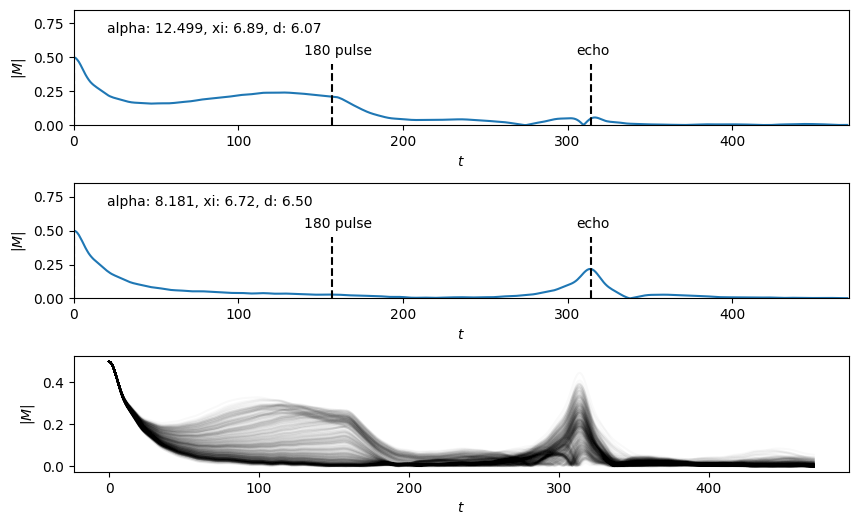

In [5]:
fig1, ax1 = plt.subplots(3,1, figsize=(10,6));

# change the following to see different curves
plot_idx1 = 0; # weak spin-spin coupling
plot_idx2 = 10; # strong spin-spin coupling

# string format for material parameter plotting
mat_format = "alpha: %.3f, xi: %.2f, d: %.2f";

# view the selected curve, with a label of the material data
ax1[0].plot(abs(M[plot_idx1,:]));
ax1[0].text(20,0.68, mat_format % tuple(mat_info[plot_idx1,:]) );
ax1[0].plot([0, 0],[0, .45],'--k')
ax1[0].plot([157, 157],[0, .45],'--k')
ax1[0].text(140,0.52,"180 pulse")
ax1[0].text(305,0.52,"echo")
ax1[0].plot([2*157, 2*157],[0, .45],'--k')
ax1[0].axis([0, 471, 0, 0.85])
ax1[0].set(ylabel="$|M|$", xlabel="$t$");

# view the selected curve, with a label of the material data
ax1[1].plot(abs(M[plot_idx2,:]));
ax1[1].text(20,0.68, mat_format % tuple(mat_info[plot_idx2,:]) );
ax1[1].plot([0, 0],[0, .45],'--k')
ax1[1].plot([157, 157],[0, .45],'--k')
ax1[1].text(140,0.52,"180 pulse")
ax1[1].text(305,0.52,"echo")
ax1[1].plot([2*157, 2*157],[0, .45],'--k')
ax1[1].axis([0, 471, 0, 0.85])
ax1[1].set(ylabel="$|M|$", xlabel="$t$");

ax1[2].plot(abs(M[1:500,:]).T,color=(0,0,0,.025));
ax1[2].set(ylabel="$|M|$", xlabel="$t$");

fig1.subplots_adjust(hspace=.5)

### Truncate, scale, and partition the training/testing sets

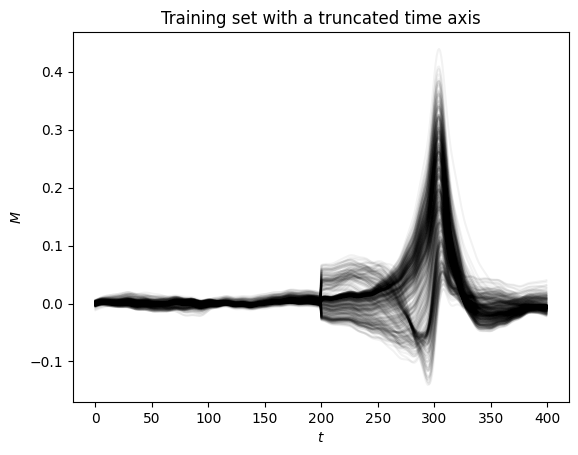

In [6]:

# number of M(t) curves
N_data = np.shape(M)[0]
# truncate time points
# !!! NOTE: May want to use all of the curve, takes longer to train though !!!
time_keep = range(210,410); # centered roughly at the echo
M_trunc = M[:,time_keep];
# split into real and imaginary
M_trunc_uncomplex = np.concatenate((np.real(M_trunc), np.imag(M_trunc)),axis=1)

# rescale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

mat_info_scaled = sc.fit_transform(mat_info);

# partition data into a training and testing set using a random partition
from sklearn.model_selection import train_test_split
M_train, M_test, mat_train, mat_test = train_test_split(M_trunc_uncomplex, mat_info_scaled, test_size=0.1)

# plot the fist 500 elements of the training set, for visualizing variations in the data
plt.plot((M_train[1:500,:]).T,color=(0,0,0,.05));
plt.xlabel("$t$")
plt.ylabel("$M$")
plt.title("Training set with a truncated time axis");

In [14]:
np.shape(M_trunc_uncomplex)

(6000, 400)

## Example solution: a simple neural net (NN)
- Our input nodes are the vector $[\textrm{Re}(M(t)), \textrm{Im}(M(t))]$, which is a few hundred elements.
- Our output nodes are the three material parameters.
- We will use a standard NN predict the material properties from $M(t)$.


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD # gradient descent optimizer

# first we build the model

N = np.shape(M_train[0])[0] # number of input values from M(t) curve

# define the net
nn = Sequential()
# Let's try N -> 100 -> 40 -> 3, e.g. 2 hidden layers
nn.add(Dense(100,input_dim=N, activation='relu'))
nn.add(Dense(40, activation='relu'))
nn.add(Dense(3, activation='linear'))

nn.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum = 0.95) )




19/19 [==============================] - 0s 3ms/step - loss: 0.1511
test loss: 0.15114182233810425
19/19 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Dissipation strength')

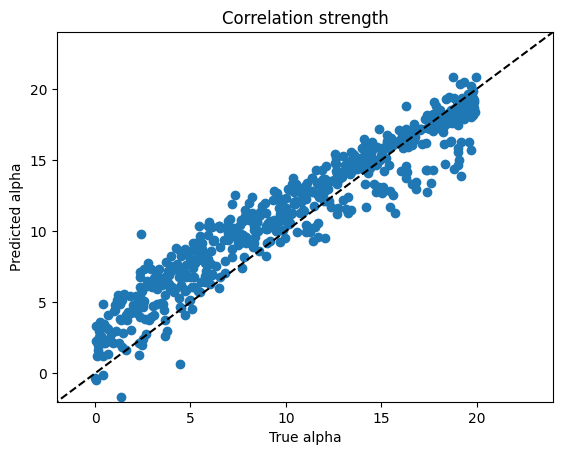

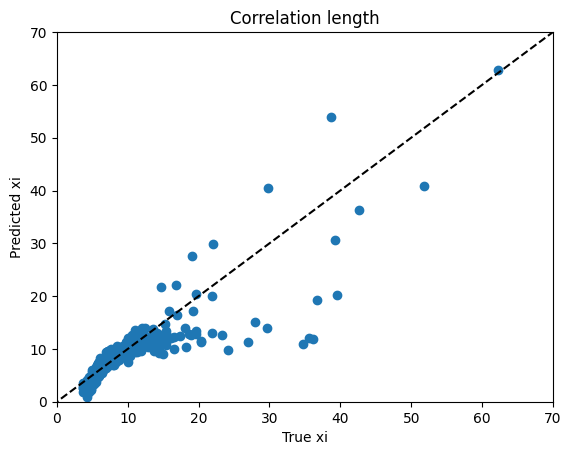

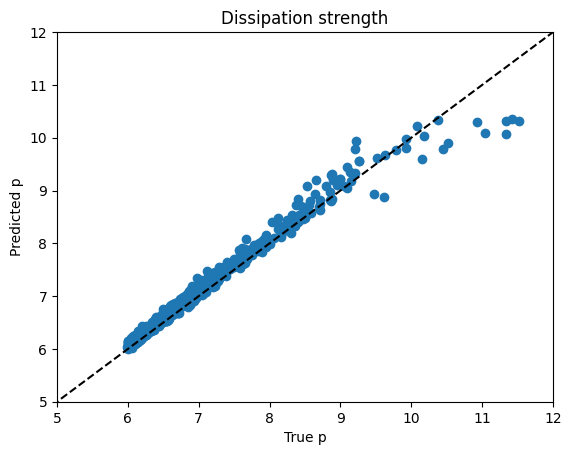

In [ ]:
# check results on test set

results = nn.evaluate(M_test,mat_test, batch_size=32);
print("test loss:", results)
nn_test_sc = sc.inverse_transform(nn.predict(M_test));
mat_test_sc = sc.inverse_transform(mat_test);

plt.scatter(mat_test_sc[:,0],nn_test_sc[:,0]);
plt.plot([-100,100],[-100, 100],"--k")
plt.xlabel("True alpha");
plt.ylabel("Predicted alpha");
plt.axis([-2, 24, -2, 24])
plt.title("Correlation strength")

plt.figure()
plt.scatter(mat_test_sc[:,1],nn_test_sc[:,1]);
plt.plot([-100, 100],[-100, 100],"--k")
plt.xlabel("True xi");
plt.ylabel("Predicted xi");
plt.axis([0, 70, 0, 70])
plt.title("Correlation length")

plt.figure()
plt.scatter(mat_test_sc[:,2],nn_test_sc[:,2]);
plt.plot([-100, 100],[-100, 100],"--k")
plt.xlabel("True p");
plt.ylabel("Predicted p");
plt.axis([5, 12, 5, 12])
plt.title("Dissipation strength")




## Heatmap of important features in the time domain

It can be helpful to visualize the relative "importance" of each input element <br> 
by back-propagating gradients of the output. For example, at a given t, we are <br> 
computing for $\alpha$:

$G_\alpha(t) = \sum_{i}  \frac{d \alpha}{d M_i(t)} $

and displaying it in red in the first plot below.

Does the real part of the data (first half of the x-axis) seem important?

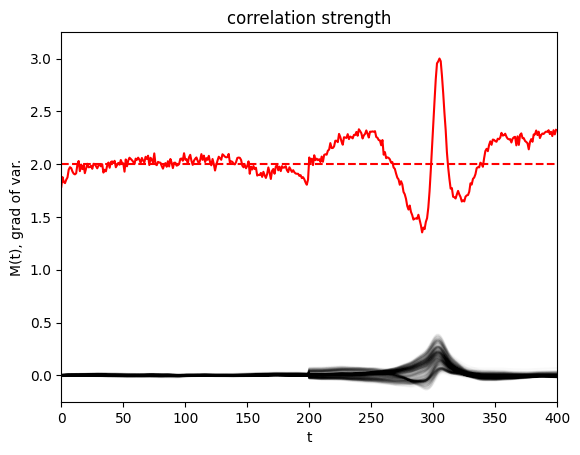

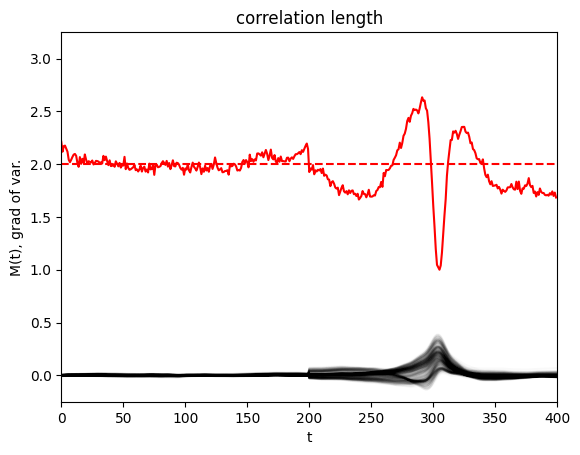

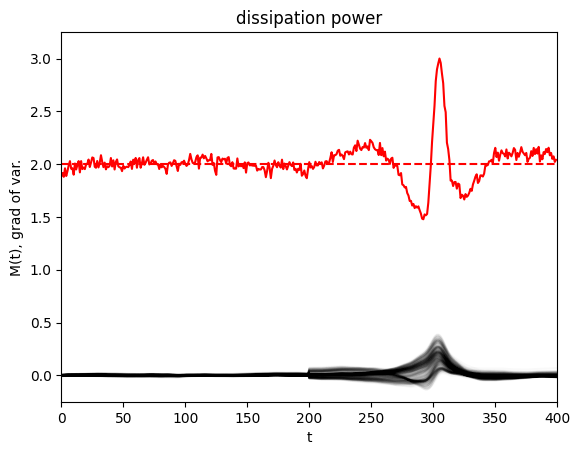

In [ ]:
# heatmap of feature importance in the time domain
from keras import backend as k
import tensorflow as tf

var_names = ["correlation strength", "correlation length", "dissipation power"]

for tar_var in range(3):
    in_tensor = tf.convert_to_tensor(M_test) # we will track gradients w.r.t. M(t)
    with tf.GradientTape() as t:
        t.watch(in_tensor)
        tar_output = tf.gather(nn(in_tensor), tar_var, axis=1) # keep track of the tar_var output

    grads = t.gradient(tar_output, in_tensor).numpy() # comput gradient using tensorflow
    grad_sum = np.sum((grads),axis=0) # sum along all testing curves

    plt.figure()
    plt.plot((M_train[1:500,:]).T,color=(0,0,0,.025))
    plt.plot(2+grad_sum/np.max(np.abs(grad_sum)),'r')
    plt.plot([0, 400],[2, 2],'--r')
    plt.title(var_names[tar_var])
    plt.xlabel('t')
    plt.axis([0, 400, -.25, 3.25])
    plt.ylabel('M(t), grad of var.')


## Submission format

__We ask you to submit two models__.

When we downloaded the data for the model development, we also downloaded spin <br> 
echos for evaluation of our models, like "gauss_echos_eval_r.txt" and <br> "RKKY_echos_eval_i.txt".<br>
These share the same format as the "\<model_type\>\_echos_model_*.txt," used for the <br> 
model training above.

Use your model to predict the three spin-interaction variables from the echos, <br> 
and submit your results for **each model** in a tab delimited .txt file of <br> dimensions 6000 x 3 matching the "\<model_type\>\_mat_info_model.txt" format.

That is, the columns should be:

| $\alpha$ | $\xi$ | $d$ |
      
and there should be 6000 rows.

Name this file "\<model_type\>_mat_info_eval.txt"

The quality of the model will be judged by the minimization of normalized <br> mean-square error:


$\textrm{Err} = \sum_{v=1}^{3} \sum_{i=i}^{6000} \left( \tilde{v}^i_\textrm{model} - \tilde{v}^i_\textrm{true} \right)^2 $

where $v^i$ is one of the three spin-interaction variables for echo number $i$, <br> 
and the tilde represents normalization of each variable (using the <br> StandardScaler() object used above).


Your submission should include: <br>
- Your ipython notebook (`.ipynb`),<br>
- A PDF copy of your notebook together with a description of what you have done,<br>
- Your model's evaluation of the Gaussian data ("gauss_mat_info_eval.txt"), <br>
- Your model's evaluation of the RKKY data ("RKKY_mat_info_eval.txt").


OUR SUBMISSION IS BELOW:

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import requests

print("Downloading files off google drive...")

f_prefix = "gauss"

# data for model creation
mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos

asdf = "https://drive.google.com/uc?export=download&id="

r = requests.get("https://drive.google.com/uc?export=download&id=1J8CcJVQRpzSwue1vuHV9uB0bngdDrKCY",allow_redirects=True)
open(mat_file, "wb").write(r.content)
r = requests.get("https://drive.google.com/uc?export=download&id=1lBWcwF--1rrB8KCyCd0-5ZnPIjRrWkHg",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://drive.google.com/uc?export=download&id=1O7KKL-SW3vHePoRNk8YfLzX82wf2Z5ul",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# data for submission of final model
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

r = requests.get("https://drive.google.com/uc?export=download&id=1prIrtO7XJs3PBe1MZiWUxK3VUkrChVvz",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://drive.google.com/uc?export=download&id=1vbKcuxe6z8cRGQdTqj_Q2u5Oow0D9hbU",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# now repeat, but for RKKY type function

f_prefix = "RKKY"    

# data for model creation
mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos
r = requests.get("https://docs.google.com/uc?export=download&id=1lS9AJ3sUFI4cfM5jQj618x4shoaJMXVo",allow_redirects=True)
open(mat_file, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1J21bKy8FTjoaGzHVdLXlWAao2UiWO7ml",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1nf3Y_FcJJEWXJbjwREAkgcnVz2tDA__I",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# data for submission of final model
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

r = requests.get("https://docs.google.com/uc?export=download&id=1Q46o_RnYZFWEjMVVF5m1VBI9HCltspyY",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1-z2ADFrBlEhXN5Z_LHiRLA4Nds_9uvQq",allow_redirects=True)
open(M_file_i, "wb").write(r.content)    
    
    
print("Done with file downloads")


In [34]:
#################### GAUSS MODEL #########################

In [62]:
f_prefix = "gauss"; # Gaussian functional between nuclei

mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos

print("Loading into numpy arrays...")
# settings of each simulated material:
# format:  |   α  |   ξ  |   d  |
mat_info = np.loadtxt(mat_file, comments="#", delimiter=None, unpack=False);

# M(t) curve for each simulation, model:
M_r = np.loadtxt(M_file_r, comments="#", delimiter=None, unpack=False);
M_i = np.loadtxt(M_file_i, comments="#", delimiter=None, unpack=False);
M = M_r + 1j*M_i;

# M(t) curve for each simulation, eval:
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

M_r_eval = np.loadtxt(M_file_r, comments="#", delimiter=None, unpack=False);
M_i_eval = np.loadtxt(M_file_i, comments="#", delimiter=None, unpack=False);
M_eval = M_r_eval + 1j*M_i_eval;

print("Done with numpy loads")

Loading into numpy arrays...
Done with numpy loads


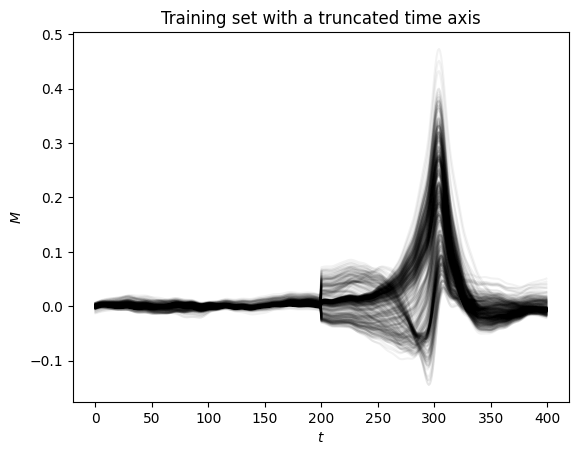

In [63]:
# number of M(t) curves
N_data = np.shape(M)[0]

# truncate time points
# !!! NOTE: May want to use all of the curve, takes longer to train though !!!
truncate = True

if truncate:
  time_keep = range(210,410); # centered roughly at the echo
  M_trunc = M[:,time_keep];
  M_eval = M_eval[:,time_keep]

else:
  M_trunc = M

# split into real and imaginary
M_trunc_uncomplex = np.concatenate((np.real(M_trunc), np.imag(M_trunc)),axis=1)
M_eval = np.concatenate((np.real(M_eval), np.imag(M_eval)),axis=1)

# rescale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

mat_info_scaled = sc.fit_transform(mat_info);

# partition data into a training and testing set using a random partition
from sklearn.model_selection import train_test_split
M_train, M_test, mat_train, mat_test = train_test_split(M_trunc_uncomplex, mat_info_scaled, test_size=0.1)

# plot the fist 500 elements of the training set, for visualizing variations in the data
plt.plot((M_train[1:500,:]).T,color=(0,0,0,.05));
plt.xlabel("$t$")
plt.ylabel("$M$")
plt.title("Training set with a truncated time axis");

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD # gradient descent optimizer


np.random.seed(42)
#tf.random.set_seed(42)


# first we build the model

N = np.shape(M_train[0])[0] # number of input values from M(t) curve

# encoder: from N to 50 dimensions
encoder = keras.models.Sequential([keras.layers.Dense(50, input_shape=[N])])
# decoder: from 50 to N dimensions
decoder = keras.models.Sequential([keras.layers.Dense(N, input_shape=[50])])

#autoencoder = keras.models.Sequential([encoder, decoder])

# define the net
nn = Sequential()
# Let's try N -> 100 -> 50 -> 10 -> 3, e.g. autoencoder + 3 hidden layers
nn.add(encoder)
nn.add(decoder)
nn.add(Dense(100,input_dim=N, activation='relu'))
nn.add(Dense(50, activation='relu'))
nn.add(Dense(10, activation='relu'))
nn.add(Dense(3, activation='linear'))

nn.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.005, momentum = 0.95) )


In [48]:
from keras.callbacks import ModelCheckpoint
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
# Training the Model

checkpoint_cb = ModelCheckpoint("/content/drive/MyDrive/gauss_0.h5", save_best_only=True)

history = nn.fit(M_train, mat_train, epochs=500, batch_size=128, callbacks=checkpoint_cb, verbose=2)

Epoch 1/500


43/43 - 2s - loss: 0.9947 - 2s/epoch - 41ms/step
Epoch 2/500


43/43 - 0s - loss: 0.9749 - 231ms/epoch - 5ms/step
Epoch 3/500


43/43 - 0s - loss: 0.9404 - 202ms/epoch - 5ms/step
Epoch 4/500


43/43 - 0s - loss: 0.8700 - 224ms/epoch - 5ms/step
Epoch 5/500


43/43 - 0s - loss: 0.7690 - 224ms/epoch - 5ms/step
Epoch 6/500


43/43 - 1s - loss: 0.7211 - 795ms/epoch - 18ms/step
Epoch 7/500


43/43 - 0s - loss: 0.6976 - 228ms/epoch - 5ms/step
Epoch 8/500


43/43 - 0s - loss: 0.7083 - 208ms/epoch - 5ms/step
Epoch 9/500


43/43 - 0s - loss: 0.6855 - 236ms/epoch - 5ms/step
Epoch 10/500


43/43 - 0s - loss: 0.6730 - 250ms/epoch - 6ms/step
Epoch 11/500


43/43 - 1s - loss: 0.6596 - 804ms/epoch - 19ms/step
Epoch 12/500


43/43 - 0s - loss: 0.6539 - 207ms/epoch - 5ms/step
Epoch 13/500


43/43 - 0s - loss: 0.6387 - 236ms/epoch - 5ms/step
Epoch 14/500


43/43 - 0s - loss: 0.6236 - 199ms/epoch - 5ms/step
Epoch 15/500


43/43 - 0s - loss: 0.6133 - 207ms/epoch - 5ms/step
Epoch 16/500


43/43 - 1s - loss: 0.6075 - 1s/epoch - 25ms/step
Epoch 17/500


43/43 - 1s - loss: 0.5781 - 989ms/epoch - 23ms/step
Epoch 18/500


43/43 - 0s - loss: 0.5634 - 492ms/epoch - 11ms/step
Epoch 19/500


43/43 - 0s - loss: 0.5333 - 335ms/epoch - 8ms/step
Epoch 20/500


43/43 - 0s - loss: 0.5245 - 337ms/epoch - 8ms/step
Epoch 21/500


43/43 - 1s - loss: 0.5266 - 780ms/epoch - 18ms/step
Epoch 22/500


43/43 - 0s - loss: 0.5155 - 322ms/epoch - 7ms/step
Epoch 23/500


43/43 - 0s - loss: 0.5105 - 211ms/epoch - 5ms/step
Epoch 24/500


43/43 - 0s - loss: 0.5079 - 233ms/epoch - 5ms/step
Epoch 25/500


43/43 - 0s - loss: 0.4974 - 202ms/epoch - 5ms/step
Epoch 26/500


43/43 - 0s - loss: 0.4892 - 203ms/epoch - 5ms/step
Epoch 27/500


43/43 - 1s - loss: 0.4968 - 847ms/epoch - 20ms/step
Epoch 28/500


43/43 - 1s - loss: 0.4965 - 913ms/epoch - 21ms/step
Epoch 29/500


43/43 - 0s - loss: 0.4838 - 289ms/epoch - 7ms/step
Epoch 30/500


43/43 - 1s - loss: 0.4924 - 850ms/epoch - 20ms/step
Epoch 31/500


43/43 - 0s - loss: 0.4865 - 217ms/epoch - 5ms/step
Epoch 32/500


43/43 - 0s - loss: 0.4759 - 231ms/epoch - 5ms/step
Epoch 33/500


43/43 - 0s - loss: 0.4704 - 225ms/epoch - 5ms/step
Epoch 34/500


43/43 - 0s - loss: 0.4654 - 208ms/epoch - 5ms/step
Epoch 35/500


43/43 - 1s - loss: 0.4620 - 1s/epoch - 24ms/step
Epoch 36/500


43/43 - 1s - loss: 0.4589 - 920ms/epoch - 21ms/step
Epoch 37/500


43/43 - 0s - loss: 0.4556 - 328ms/epoch - 8ms/step
Epoch 38/500


43/43 - 0s - loss: 0.5387 - 224ms/epoch - 5ms/step
Epoch 39/500


43/43 - 0s - loss: 0.4355 - 239ms/epoch - 6ms/step
Epoch 40/500


43/43 - 0s - loss: 0.4376 - 210ms/epoch - 5ms/step
Epoch 41/500


43/43 - 1s - loss: 0.4734 - 1s/epoch - 24ms/step
Epoch 42/500


43/43 - 0s - loss: 0.4063 - 369ms/epoch - 9ms/step
Epoch 43/500


43/43 - 0s - loss: 0.4816 - 208ms/epoch - 5ms/step
Epoch 44/500


43/43 - 0s - loss: 0.4344 - 240ms/epoch - 6ms/step
Epoch 45/500


43/43 - 1s - loss: 0.4115 - 519ms/epoch - 12ms/step
Epoch 46/500


43/43 - 0s - loss: 0.4110 - 345ms/epoch - 8ms/step
Epoch 47/500


43/43 - 0s - loss: 0.3599 - 340ms/epoch - 8ms/step
Epoch 48/500


43/43 - 1s - loss: 0.4189 - 1s/epoch - 24ms/step
Epoch 49/500


43/43 - 1s - loss: 0.3957 - 956ms/epoch - 22ms/step
Epoch 50/500


43/43 - 1s - loss: 0.3858 - 926ms/epoch - 22ms/step
Epoch 51/500


43/43 - 0s - loss: 0.3706 - 300ms/epoch - 7ms/step
Epoch 52/500


43/43 - 0s - loss: 0.3516 - 212ms/epoch - 5ms/step
Epoch 53/500


43/43 - 0s - loss: 0.3303 - 200ms/epoch - 5ms/step
Epoch 54/500


43/43 - 0s - loss: 0.3492 - 216ms/epoch - 5ms/step
Epoch 55/500


43/43 - 1s - loss: 0.3046 - 1s/epoch - 25ms/step
Epoch 56/500


43/43 - 0s - loss: 0.2628 - 381ms/epoch - 9ms/step
Epoch 57/500


43/43 - 0s - loss: 0.3390 - 203ms/epoch - 5ms/step
Epoch 58/500


43/43 - 0s - loss: 0.2441 - 220ms/epoch - 5ms/step
Epoch 59/500


43/43 - 0s - loss: 0.2713 - 216ms/epoch - 5ms/step
Epoch 60/500


43/43 - 1s - loss: 0.2590 - 1s/epoch - 24ms/step
Epoch 61/500


43/43 - 1s - loss: 0.2593 - 914ms/epoch - 21ms/step
Epoch 62/500


43/43 - 1s - loss: 0.3477 - 921ms/epoch - 21ms/step
Epoch 63/500


43/43 - 0s - loss: 0.3813 - 344ms/epoch - 8ms/step
Epoch 64/500


43/43 - 0s - loss: 0.3035 - 212ms/epoch - 5ms/step
Epoch 65/500


43/43 - 0s - loss: 0.2376 - 209ms/epoch - 5ms/step
Epoch 66/500


43/43 - 0s - loss: 0.3219 - 221ms/epoch - 5ms/step
Epoch 67/500


43/43 - 1s - loss: 0.2995 - 1s/epoch - 25ms/step
Epoch 68/500


43/43 - 0s - loss: 0.2259 - 361ms/epoch - 8ms/step
Epoch 69/500


43/43 - 0s - loss: 0.2324 - 199ms/epoch - 5ms/step
Epoch 70/500


43/43 - 0s - loss: 0.2046 - 201ms/epoch - 5ms/step
Epoch 71/500


43/43 - 0s - loss: 0.2682 - 220ms/epoch - 5ms/step
Epoch 72/500


43/43 - 1s - loss: 0.2527 - 1s/epoch - 25ms/step
Epoch 73/500


43/43 - 1s - loss: 0.2425 - 952ms/epoch - 22ms/step
Epoch 74/500


43/43 - 1s - loss: 0.1812 - 971ms/epoch - 23ms/step
Epoch 75/500


43/43 - 1s - loss: 0.2871 - 972ms/epoch - 23ms/step
Epoch 76/500


43/43 - 0s - loss: 0.2356 - 300ms/epoch - 7ms/step
Epoch 77/500


43/43 - 0s - loss: 0.3009 - 217ms/epoch - 5ms/step
Epoch 78/500


43/43 - 0s - loss: 0.3319 - 222ms/epoch - 5ms/step
Epoch 79/500


43/43 - 0s - loss: 0.2438 - 205ms/epoch - 5ms/step
Epoch 80/500


43/43 - 0s - loss: 0.2405 - 263ms/epoch - 6ms/step
Epoch 81/500


43/43 - 1s - loss: 0.2084 - 834ms/epoch - 19ms/step
Epoch 82/500


43/43 - 0s - loss: 0.2991 - 229ms/epoch - 5ms/step
Epoch 83/500


43/43 - 0s - loss: 0.1884 - 216ms/epoch - 5ms/step
Epoch 84/500


43/43 - 0s - loss: 0.2020 - 213ms/epoch - 5ms/step
Epoch 85/500


43/43 - 0s - loss: 0.2569 - 207ms/epoch - 5ms/step
Epoch 86/500


43/43 - 1s - loss: 0.1943 - 1s/epoch - 24ms/step
Epoch 87/500


43/43 - 0s - loss: 0.2038 - 387ms/epoch - 9ms/step
Epoch 88/500


43/43 - 0s - loss: 0.1827 - 209ms/epoch - 5ms/step
Epoch 89/500


43/43 - 0s - loss: 0.1691 - 214ms/epoch - 5ms/step
Epoch 90/500


43/43 - 0s - loss: 0.2446 - 205ms/epoch - 5ms/step
Epoch 91/500


43/43 - 0s - loss: 0.2134 - 213ms/epoch - 5ms/step
Epoch 92/500


43/43 - 1s - loss: 0.1879 - 750ms/epoch - 17ms/step
Epoch 93/500


43/43 - 0s - loss: 0.1546 - 365ms/epoch - 8ms/step
Epoch 94/500


43/43 - 0s - loss: 0.1709 - 220ms/epoch - 5ms/step
Epoch 95/500


43/43 - 0s - loss: 0.1658 - 210ms/epoch - 5ms/step
Epoch 96/500


43/43 - 0s - loss: 0.2006 - 211ms/epoch - 5ms/step
Epoch 97/500


43/43 - 0s - loss: 0.1870 - 336ms/epoch - 8ms/step
Epoch 98/500


43/43 - 0s - loss: 0.2132 - 208ms/epoch - 5ms/step
Epoch 99/500


43/43 - 0s - loss: 0.4608 - 221ms/epoch - 5ms/step
Epoch 100/500


43/43 - 0s - loss: 0.2910 - 225ms/epoch - 5ms/step
Epoch 101/500


43/43 - 0s - loss: 0.2143 - 218ms/epoch - 5ms/step
Epoch 102/500


43/43 - 1s - loss: 0.2078 - 793ms/epoch - 18ms/step
Epoch 103/500


43/43 - 1s - loss: 0.1663 - 938ms/epoch - 22ms/step
Epoch 104/500


43/43 - 1s - loss: 0.2815 - 970ms/epoch - 23ms/step
Epoch 105/500


43/43 - 0s - loss: 0.2146 - 463ms/epoch - 11ms/step
Epoch 106/500


43/43 - 0s - loss: 0.1653 - 355ms/epoch - 8ms/step
Epoch 107/500


43/43 - 0s - loss: 0.2071 - 359ms/epoch - 8ms/step
Epoch 108/500


43/43 - 1s - loss: 0.2394 - 835ms/epoch - 19ms/step
Epoch 109/500


43/43 - 1s - loss: 0.1648 - 925ms/epoch - 22ms/step
Epoch 110/500


43/43 - 0s - loss: 0.1464 - 335ms/epoch - 8ms/step
Epoch 111/500


43/43 - 0s - loss: 0.1667 - 234ms/epoch - 5ms/step
Epoch 112/500


43/43 - 0s - loss: 0.1760 - 212ms/epoch - 5ms/step
Epoch 113/500


43/43 - 0s - loss: 0.3311 - 217ms/epoch - 5ms/step
Epoch 114/500


43/43 - 1s - loss: 0.2273 - 1s/epoch - 24ms/step
Epoch 115/500


43/43 - 1s - loss: 0.1636 - 915ms/epoch - 21ms/step
Epoch 116/500


43/43 - 0s - loss: 0.1684 - 295ms/epoch - 7ms/step
Epoch 117/500


43/43 - 0s - loss: 0.1851 - 225ms/epoch - 5ms/step
Epoch 118/500


43/43 - 0s - loss: 0.1734 - 221ms/epoch - 5ms/step
Epoch 119/500


43/43 - 0s - loss: 0.1807 - 210ms/epoch - 5ms/step
Epoch 120/500


43/43 - 0s - loss: 0.1798 - 217ms/epoch - 5ms/step
Epoch 121/500


43/43 - 1s - loss: 0.1616 - 818ms/epoch - 19ms/step
Epoch 122/500


43/43 - 0s - loss: 0.2416 - 327ms/epoch - 8ms/step
Epoch 123/500


43/43 - 0s - loss: 0.1631 - 218ms/epoch - 5ms/step
Epoch 124/500


43/43 - 0s - loss: 0.1416 - 220ms/epoch - 5ms/step
Epoch 125/500


43/43 - 0s - loss: 0.2256 - 482ms/epoch - 11ms/step
Epoch 126/500


43/43 - 0s - loss: 0.1997 - 213ms/epoch - 5ms/step
Epoch 127/500


43/43 - 0s - loss: 0.1605 - 216ms/epoch - 5ms/step
Epoch 128/500


43/43 - 0s - loss: 0.1351 - 209ms/epoch - 5ms/step
Epoch 129/500


43/43 - 0s - loss: 0.1543 - 204ms/epoch - 5ms/step
Epoch 130/500


43/43 - 1s - loss: 0.1469 - 841ms/epoch - 20ms/step
Epoch 131/500


43/43 - 0s - loss: 0.1714 - 330ms/epoch - 8ms/step
Epoch 132/500


43/43 - 0s - loss: 0.1483 - 205ms/epoch - 5ms/step
Epoch 133/500


43/43 - 0s - loss: 0.1520 - 230ms/epoch - 5ms/step
Epoch 134/500


43/43 - 1s - loss: 0.1601 - 501ms/epoch - 12ms/step
Epoch 135/500


43/43 - 1s - loss: 0.2756 - 850ms/epoch - 20ms/step
Epoch 136/500


43/43 - 0s - loss: 0.1893 - 351ms/epoch - 8ms/step
Epoch 137/500


43/43 - 0s - loss: 0.2075 - 356ms/epoch - 8ms/step
Epoch 138/500


43/43 - 0s - loss: 0.1862 - 466ms/epoch - 11ms/step
Epoch 139/500


43/43 - 0s - loss: 0.1722 - 339ms/epoch - 8ms/step
Epoch 140/500


43/43 - 0s - loss: 0.1326 - 337ms/epoch - 8ms/step
Epoch 141/500


43/43 - 1s - loss: 0.1321 - 638ms/epoch - 15ms/step
Epoch 142/500


43/43 - 0s - loss: 0.1573 - 219ms/epoch - 5ms/step
Epoch 143/500


43/43 - 0s - loss: 0.2028 - 210ms/epoch - 5ms/step
Epoch 144/500


43/43 - 1s - loss: 0.1844 - 943ms/epoch - 22ms/step
Epoch 145/500


43/43 - 0s - loss: 0.2545 - 353ms/epoch - 8ms/step
Epoch 146/500


43/43 - 0s - loss: 0.2206 - 340ms/epoch - 8ms/step
Epoch 147/500


43/43 - 1s - loss: 0.1587 - 755ms/epoch - 18ms/step
Epoch 148/500


43/43 - 0s - loss: 0.1224 - 390ms/epoch - 9ms/step
Epoch 149/500


43/43 - 1s - loss: 0.1270 - 1s/epoch - 26ms/step
Epoch 150/500


43/43 - 1s - loss: 0.1908 - 918ms/epoch - 21ms/step
Epoch 151/500


43/43 - 0s - loss: 0.2156 - 293ms/epoch - 7ms/step
Epoch 152/500


43/43 - 0s - loss: 0.1573 - 199ms/epoch - 5ms/step
Epoch 153/500


43/43 - 0s - loss: 0.1328 - 181ms/epoch - 4ms/step
Epoch 154/500


43/43 - 0s - loss: 0.1166 - 191ms/epoch - 4ms/step
Epoch 155/500


43/43 - 0s - loss: 0.1324 - 232ms/epoch - 5ms/step
Epoch 156/500


43/43 - 1s - loss: 0.1350 - 921ms/epoch - 21ms/step
Epoch 157/500


43/43 - 0s - loss: 0.1606 - 363ms/epoch - 8ms/step
Epoch 158/500


43/43 - 0s - loss: 0.1707 - 224ms/epoch - 5ms/step
Epoch 159/500


43/43 - 0s - loss: 0.1677 - 209ms/epoch - 5ms/step
Epoch 160/500


43/43 - 0s - loss: 0.1699 - 233ms/epoch - 5ms/step
Epoch 161/500


43/43 - 0s - loss: 0.2716 - 308ms/epoch - 7ms/step
Epoch 162/500


43/43 - 0s - loss: 0.1543 - 210ms/epoch - 5ms/step
Epoch 163/500


43/43 - 0s - loss: 0.1433 - 216ms/epoch - 5ms/step
Epoch 164/500


43/43 - 0s - loss: 0.1606 - 224ms/epoch - 5ms/step
Epoch 165/500


43/43 - 0s - loss: 0.1329 - 217ms/epoch - 5ms/step
Epoch 166/500


43/43 - 1s - loss: 0.1676 - 824ms/epoch - 19ms/step
Epoch 167/500


43/43 - 1s - loss: 0.1504 - 950ms/epoch - 22ms/step
Epoch 168/500


43/43 - 1s - loss: 0.1457 - 976ms/epoch - 23ms/step
Epoch 169/500


43/43 - 1s - loss: 0.1671 - 987ms/epoch - 23ms/step
Epoch 170/500


43/43 - 0s - loss: 0.1627 - 370ms/epoch - 9ms/step
Epoch 171/500


43/43 - 0s - loss: 0.1194 - 218ms/epoch - 5ms/step
Epoch 172/500


43/43 - 0s - loss: 0.1308 - 217ms/epoch - 5ms/step
Epoch 173/500


43/43 - 0s - loss: 0.1453 - 211ms/epoch - 5ms/step
Epoch 174/500


43/43 - 0s - loss: 0.1546 - 273ms/epoch - 6ms/step
Epoch 175/500


43/43 - 0s - loss: 0.1253 - 211ms/epoch - 5ms/step
Epoch 176/500


43/43 - 0s - loss: 0.1150 - 218ms/epoch - 5ms/step
Epoch 177/500


43/43 - 0s - loss: 0.1333 - 199ms/epoch - 5ms/step
Epoch 178/500


43/43 - 0s - loss: 0.1288 - 210ms/epoch - 5ms/step
Epoch 179/500


43/43 - 1s - loss: 0.1300 - 864ms/epoch - 20ms/step
Epoch 180/500


43/43 - 1s - loss: 0.1314 - 915ms/epoch - 21ms/step
Epoch 181/500


43/43 - 0s - loss: 0.1355 - 292ms/epoch - 7ms/step
Epoch 182/500


43/43 - 0s - loss: 0.1341 - 223ms/epoch - 5ms/step
Epoch 183/500


43/43 - 0s - loss: 0.1415 - 215ms/epoch - 5ms/step
Epoch 184/500


43/43 - 0s - loss: 0.1815 - 214ms/epoch - 5ms/step
Epoch 185/500


43/43 - 0s - loss: 0.1111 - 263ms/epoch - 6ms/step
Epoch 186/500


43/43 - 1s - loss: 0.1670 - 855ms/epoch - 20ms/step
Epoch 187/500


43/43 - 0s - loss: 0.1319 - 198ms/epoch - 5ms/step
Epoch 188/500


43/43 - 0s - loss: 0.1266 - 224ms/epoch - 5ms/step
Epoch 189/500


43/43 - 0s - loss: 0.1528 - 227ms/epoch - 5ms/step
Epoch 190/500


43/43 - 0s - loss: 0.1322 - 213ms/epoch - 5ms/step
Epoch 191/500


43/43 - 0s - loss: 0.1246 - 273ms/epoch - 6ms/step
Epoch 192/500


43/43 - 1s - loss: 0.1474 - 829ms/epoch - 19ms/step
Epoch 193/500


43/43 - 0s - loss: 0.1239 - 207ms/epoch - 5ms/step
Epoch 194/500


43/43 - 0s - loss: 0.1520 - 228ms/epoch - 5ms/step
Epoch 195/500


43/43 - 0s - loss: 0.1820 - 207ms/epoch - 5ms/step
Epoch 196/500


43/43 - 0s - loss: 0.1457 - 225ms/epoch - 5ms/step
Epoch 197/500


43/43 - 1s - loss: 0.1113 - 1s/epoch - 25ms/step
Epoch 198/500


43/43 - 1s - loss: 0.1991 - 992ms/epoch - 23ms/step
Epoch 199/500


43/43 - 1s - loss: 0.1183 - 985ms/epoch - 23ms/step
Epoch 200/500


43/43 - 0s - loss: 0.1133 - 436ms/epoch - 10ms/step
Epoch 201/500


43/43 - 0s - loss: 0.1117 - 351ms/epoch - 8ms/step
Epoch 202/500


43/43 - 1s - loss: 0.1132 - 1s/epoch - 26ms/step
Epoch 203/500


43/43 - 0s - loss: 0.1414 - 293ms/epoch - 7ms/step
Epoch 204/500


43/43 - 0s - loss: 0.1363 - 230ms/epoch - 5ms/step
Epoch 205/500


43/43 - 0s - loss: 0.2290 - 231ms/epoch - 5ms/step
Epoch 206/500


43/43 - 0s - loss: 0.1546 - 199ms/epoch - 5ms/step
Epoch 207/500


43/43 - 0s - loss: 0.1250 - 214ms/epoch - 5ms/step
Epoch 208/500


43/43 - 1s - loss: 0.1254 - 838ms/epoch - 19ms/step
Epoch 209/500


43/43 - 0s - loss: 0.1629 - 374ms/epoch - 9ms/step
Epoch 210/500


43/43 - 0s - loss: 0.1364 - 234ms/epoch - 5ms/step
Epoch 211/500


43/43 - 0s - loss: 0.1602 - 213ms/epoch - 5ms/step
Epoch 212/500


43/43 - 0s - loss: 0.1176 - 427ms/epoch - 10ms/step
Epoch 213/500


43/43 - 1s - loss: 0.1292 - 825ms/epoch - 19ms/step
Epoch 214/500


43/43 - 0s - loss: 0.1054 - 211ms/epoch - 5ms/step
Epoch 215/500


43/43 - 0s - loss: 0.1484 - 224ms/epoch - 5ms/step
Epoch 216/500


43/43 - 0s - loss: 0.1893 - 234ms/epoch - 5ms/step
Epoch 217/500


43/43 - 0s - loss: 0.1259 - 217ms/epoch - 5ms/step
Epoch 218/500


43/43 - 1s - loss: 0.0990 - 1s/epoch - 23ms/step
Epoch 219/500


43/43 - 0s - loss: 0.0959 - 378ms/epoch - 9ms/step
Epoch 220/500


43/43 - 0s - loss: 0.1326 - 205ms/epoch - 5ms/step
Epoch 221/500


43/43 - 0s - loss: 0.1840 - 220ms/epoch - 5ms/step
Epoch 222/500


43/43 - 0s - loss: 0.1249 - 204ms/epoch - 5ms/step
Epoch 223/500


43/43 - 1s - loss: 0.1428 - 1s/epoch - 24ms/step
Epoch 224/500


43/43 - 1s - loss: 0.1041 - 920ms/epoch - 21ms/step
Epoch 225/500


43/43 - 0s - loss: 0.1679 - 291ms/epoch - 7ms/step
Epoch 226/500


43/43 - 0s - loss: 0.1216 - 346ms/epoch - 8ms/step
Epoch 227/500


43/43 - 0s - loss: 0.1226 - 353ms/epoch - 8ms/step
Epoch 228/500


43/43 - 1s - loss: 0.2673 - 1s/epoch - 24ms/step
Epoch 229/500


43/43 - 1s - loss: 0.1606 - 1s/epoch - 23ms/step
Epoch 230/500


43/43 - 1s - loss: 0.1139 - 982ms/epoch - 23ms/step
Epoch 231/500


43/43 - 1s - loss: 0.1150 - 912ms/epoch - 21ms/step
Epoch 232/500


43/43 - 0s - loss: 0.1044 - 286ms/epoch - 7ms/step
Epoch 233/500


43/43 - 1s - loss: 0.1214 - 827ms/epoch - 19ms/step
Epoch 234/500


43/43 - 0s - loss: 0.1031 - 225ms/epoch - 5ms/step
Epoch 235/500


43/43 - 1s - loss: 0.1195 - 737ms/epoch - 17ms/step
Epoch 236/500


43/43 - 0s - loss: 0.1741 - 220ms/epoch - 5ms/step
Epoch 237/500


43/43 - 1s - loss: 0.3435 - 755ms/epoch - 18ms/step
Epoch 238/500


43/43 - 0s - loss: 0.1653 - 205ms/epoch - 5ms/step
Epoch 239/500


43/43 - 0s - loss: 0.1322 - 210ms/epoch - 5ms/step
Epoch 240/500


43/43 - 0s - loss: 0.1140 - 222ms/epoch - 5ms/step
Epoch 241/500


43/43 - 0s - loss: 0.1013 - 216ms/epoch - 5ms/step
Epoch 242/500


43/43 - 0s - loss: 0.1034 - 275ms/epoch - 6ms/step
Epoch 243/500


43/43 - 0s - loss: 0.1031 - 218ms/epoch - 5ms/step
Epoch 244/500


43/43 - 0s - loss: 0.1182 - 202ms/epoch - 5ms/step
Epoch 245/500


43/43 - 0s - loss: 0.1001 - 205ms/epoch - 5ms/step
Epoch 246/500


43/43 - 0s - loss: 0.1002 - 290ms/epoch - 7ms/step
Epoch 247/500


43/43 - 0s - loss: 0.0961 - 214ms/epoch - 5ms/step
Epoch 248/500


43/43 - 0s - loss: 0.0897 - 214ms/epoch - 5ms/step
Epoch 249/500


43/43 - 0s - loss: 0.0870 - 221ms/epoch - 5ms/step
Epoch 250/500


43/43 - 0s - loss: 0.1400 - 236ms/epoch - 5ms/step
Epoch 251/500


43/43 - 0s - loss: 0.1429 - 256ms/epoch - 6ms/step
Epoch 252/500


43/43 - 0s - loss: 0.1165 - 211ms/epoch - 5ms/step
Epoch 253/500


43/43 - 0s - loss: 0.1160 - 203ms/epoch - 5ms/step
Epoch 254/500


43/43 - 0s - loss: 0.1154 - 206ms/epoch - 5ms/step
Epoch 255/500


43/43 - 0s - loss: 0.0861 - 279ms/epoch - 6ms/step
Epoch 256/500


43/43 - 0s - loss: 0.1089 - 231ms/epoch - 5ms/step
Epoch 257/500


43/43 - 0s - loss: 0.1542 - 222ms/epoch - 5ms/step
Epoch 258/500


43/43 - 0s - loss: 0.1471 - 204ms/epoch - 5ms/step
Epoch 259/500


43/43 - 0s - loss: 0.1333 - 222ms/epoch - 5ms/step
Epoch 260/500


43/43 - 1s - loss: 0.1127 - 874ms/epoch - 20ms/step
Epoch 261/500


43/43 - 1s - loss: 0.0917 - 948ms/epoch - 22ms/step
Epoch 262/500


43/43 - 0s - loss: 0.0900 - 425ms/epoch - 10ms/step
Epoch 263/500


43/43 - 0s - loss: 0.0854 - 354ms/epoch - 8ms/step
Epoch 264/500


43/43 - 0s - loss: 0.1594 - 366ms/epoch - 9ms/step
Epoch 265/500


43/43 - 1s - loss: 0.1623 - 940ms/epoch - 22ms/step
Epoch 266/500


43/43 - 1s - loss: 0.1030 - 932ms/epoch - 22ms/step
Epoch 267/500


43/43 - 0s - loss: 0.0920 - 355ms/epoch - 8ms/step
Epoch 268/500


43/43 - 0s - loss: 0.1053 - 216ms/epoch - 5ms/step
Epoch 269/500


43/43 - 0s - loss: 0.1211 - 209ms/epoch - 5ms/step
Epoch 270/500


43/43 - 0s - loss: 0.1331 - 201ms/epoch - 5ms/step
Epoch 271/500


43/43 - 0s - loss: 0.1031 - 224ms/epoch - 5ms/step
Epoch 272/500


43/43 - 1s - loss: 0.1334 - 751ms/epoch - 17ms/step
Epoch 273/500


43/43 - 0s - loss: 0.1102 - 362ms/epoch - 8ms/step
Epoch 274/500


43/43 - 0s - loss: 0.0935 - 226ms/epoch - 5ms/step
Epoch 275/500


43/43 - 0s - loss: 0.1301 - 214ms/epoch - 5ms/step
Epoch 276/500


43/43 - 0s - loss: 0.1086 - 205ms/epoch - 5ms/step
Epoch 277/500


43/43 - 0s - loss: 0.1021 - 316ms/epoch - 7ms/step
Epoch 278/500


43/43 - 0s - loss: 0.0899 - 213ms/epoch - 5ms/step
Epoch 279/500


43/43 - 0s - loss: 0.0875 - 212ms/epoch - 5ms/step
Epoch 280/500


43/43 - 0s - loss: 0.1082 - 225ms/epoch - 5ms/step
Epoch 281/500


43/43 - 0s - loss: 0.1228 - 221ms/epoch - 5ms/step
Epoch 282/500


43/43 - 1s - loss: 0.1006 - 807ms/epoch - 19ms/step
Epoch 283/500


43/43 - 1s - loss: 0.1025 - 919ms/epoch - 21ms/step
Epoch 284/500


43/43 - 0s - loss: 0.1652 - 285ms/epoch - 7ms/step
Epoch 285/500


43/43 - 0s - loss: 0.1691 - 228ms/epoch - 5ms/step
Epoch 286/500


43/43 - 0s - loss: 0.1014 - 211ms/epoch - 5ms/step
Epoch 287/500


43/43 - 0s - loss: 0.0968 - 293ms/epoch - 7ms/step
Epoch 288/500


43/43 - 1s - loss: 0.0773 - 1s/epoch - 26ms/step
Epoch 289/500


43/43 - 1s - loss: 0.0985 - 915ms/epoch - 21ms/step
Epoch 290/500


43/43 - 1s - loss: 0.0784 - 1s/epoch - 24ms/step
Epoch 291/500


43/43 - 1s - loss: 0.1809 - 1s/epoch - 24ms/step
Epoch 292/500


43/43 - 1s - loss: 0.2095 - 1s/epoch - 26ms/step
Epoch 293/500


43/43 - 1s - loss: 0.1033 - 709ms/epoch - 16ms/step
Epoch 294/500


43/43 - 1s - loss: 0.0815 - 902ms/epoch - 21ms/step
Epoch 295/500


43/43 - 0s - loss: 0.0991 - 335ms/epoch - 8ms/step
Epoch 296/500


43/43 - 1s - loss: 0.1062 - 843ms/epoch - 20ms/step
Epoch 297/500


43/43 - 0s - loss: 0.0830 - 368ms/epoch - 9ms/step
Epoch 298/500


43/43 - 0s - loss: 0.0798 - 198ms/epoch - 5ms/step
Epoch 299/500


43/43 - 0s - loss: 0.0829 - 259ms/epoch - 6ms/step
Epoch 300/500


43/43 - 0s - loss: 0.1577 - 435ms/epoch - 10ms/step
Epoch 301/500


43/43 - 0s - loss: 0.1812 - 231ms/epoch - 5ms/step
Epoch 302/500


43/43 - 0s - loss: 0.1470 - 225ms/epoch - 5ms/step
Epoch 303/500


43/43 - 0s - loss: 0.1475 - 226ms/epoch - 5ms/step
Epoch 304/500


43/43 - 1s - loss: 0.1048 - 1s/epoch - 23ms/step
Epoch 305/500


43/43 - 0s - loss: 0.1267 - 384ms/epoch - 9ms/step
Epoch 306/500


43/43 - 0s - loss: 0.1035 - 217ms/epoch - 5ms/step
Epoch 307/500


43/43 - 0s - loss: 0.0876 - 230ms/epoch - 5ms/step
Epoch 308/500


43/43 - 0s - loss: 0.0804 - 423ms/epoch - 10ms/step
Epoch 309/500


43/43 - 0s - loss: 0.0975 - 224ms/epoch - 5ms/step
Epoch 310/500


43/43 - 0s - loss: 0.1493 - 218ms/epoch - 5ms/step
Epoch 311/500


43/43 - 0s - loss: 0.1408 - 232ms/epoch - 5ms/step
Epoch 312/500


43/43 - 1s - loss: 0.1338 - 1s/epoch - 24ms/step
Epoch 313/500


43/43 - 0s - loss: 0.1045 - 368ms/epoch - 9ms/step
Epoch 314/500


43/43 - 0s - loss: 0.1044 - 228ms/epoch - 5ms/step
Epoch 315/500


43/43 - 0s - loss: 0.1110 - 219ms/epoch - 5ms/step
Epoch 316/500


43/43 - 0s - loss: 0.1125 - 481ms/epoch - 11ms/step
Epoch 317/500


43/43 - 0s - loss: 0.1011 - 223ms/epoch - 5ms/step
Epoch 318/500


43/43 - 0s - loss: 0.0809 - 202ms/epoch - 5ms/step
Epoch 319/500


43/43 - 0s - loss: 0.0769 - 224ms/epoch - 5ms/step
Epoch 320/500


43/43 - 1s - loss: 0.1057 - 1s/epoch - 25ms/step
Epoch 321/500


43/43 - 1s - loss: 0.1300 - 968ms/epoch - 23ms/step
Epoch 322/500


43/43 - 1s - loss: 0.0888 - 959ms/epoch - 22ms/step
Epoch 323/500


43/43 - 0s - loss: 0.1116 - 445ms/epoch - 10ms/step
Epoch 324/500


43/43 - 0s - loss: 0.1606 - 273ms/epoch - 6ms/step
Epoch 325/500


43/43 - 0s - loss: 0.1332 - 205ms/epoch - 5ms/step
Epoch 326/500


43/43 - 0s - loss: 0.0960 - 441ms/epoch - 10ms/step
Epoch 327/500


43/43 - 0s - loss: 0.2279 - 206ms/epoch - 5ms/step
Epoch 328/500


43/43 - 0s - loss: 0.1337 - 212ms/epoch - 5ms/step
Epoch 329/500


43/43 - 0s - loss: 0.1021 - 239ms/epoch - 6ms/step
Epoch 330/500


43/43 - 1s - loss: 0.0959 - 810ms/epoch - 19ms/step
Epoch 331/500


43/43 - 0s - loss: 0.0793 - 204ms/epoch - 5ms/step
Epoch 332/500


43/43 - 0s - loss: 0.1031 - 212ms/epoch - 5ms/step
Epoch 333/500


43/43 - 0s - loss: 0.0759 - 215ms/epoch - 5ms/step
Epoch 334/500


43/43 - 0s - loss: 0.0746 - 223ms/epoch - 5ms/step
Epoch 335/500


43/43 - 1s - loss: 0.0737 - 1s/epoch - 24ms/step
Epoch 336/500


43/43 - 0s - loss: 0.0979 - 368ms/epoch - 9ms/step
Epoch 337/500


43/43 - 0s - loss: 0.0919 - 232ms/epoch - 5ms/step
Epoch 338/500


43/43 - 0s - loss: 0.1033 - 208ms/epoch - 5ms/step
Epoch 339/500


43/43 - 0s - loss: 0.1393 - 212ms/epoch - 5ms/step
Epoch 340/500


43/43 - 1s - loss: 0.1662 - 1s/epoch - 24ms/step
Epoch 341/500


43/43 - 1s - loss: 0.0993 - 904ms/epoch - 21ms/step
Epoch 342/500


43/43 - 0s - loss: 0.0898 - 310ms/epoch - 7ms/step
Epoch 343/500


43/43 - 0s - loss: 0.1416 - 213ms/epoch - 5ms/step
Epoch 344/500


43/43 - 0s - loss: 0.1116 - 200ms/epoch - 5ms/step
Epoch 345/500


43/43 - 0s - loss: 0.1642 - 231ms/epoch - 5ms/step
Epoch 346/500


43/43 - 0s - loss: 0.1460 - 215ms/epoch - 5ms/step
Epoch 347/500


43/43 - 1s - loss: 0.1329 - 845ms/epoch - 20ms/step
Epoch 348/500


43/43 - 0s - loss: 0.0857 - 360ms/epoch - 8ms/step
Epoch 349/500


43/43 - 0s - loss: 0.0937 - 208ms/epoch - 5ms/step
Epoch 350/500


43/43 - 0s - loss: 0.1141 - 364ms/epoch - 8ms/step
Epoch 351/500


43/43 - 0s - loss: 0.1070 - 463ms/epoch - 11ms/step
Epoch 352/500


43/43 - 0s - loss: 0.0803 - 345ms/epoch - 8ms/step
Epoch 353/500


43/43 - 0s - loss: 0.0867 - 336ms/epoch - 8ms/step
Epoch 354/500


43/43 - 1s - loss: 0.0851 - 1s/epoch - 24ms/step
Epoch 355/500


43/43 - 1s - loss: 0.0767 - 860ms/epoch - 20ms/step
Epoch 356/500


43/43 - 0s - loss: 0.0876 - 397ms/epoch - 9ms/step
Epoch 357/500


43/43 - 0s - loss: 0.1557 - 203ms/epoch - 5ms/step
Epoch 358/500


43/43 - 0s - loss: 0.1015 - 225ms/epoch - 5ms/step
Epoch 359/500


43/43 - 0s - loss: 0.0764 - 230ms/epoch - 5ms/step
Epoch 360/500


43/43 - 1s - loss: 0.0917 - 1s/epoch - 24ms/step
Epoch 361/500


43/43 - 1s - loss: 0.0919 - 828ms/epoch - 19ms/step
Epoch 362/500


43/43 - 0s - loss: 0.0928 - 328ms/epoch - 8ms/step
Epoch 363/500


43/43 - 0s - loss: 0.0752 - 241ms/epoch - 6ms/step
Epoch 364/500


43/43 - 0s - loss: 0.1200 - 215ms/epoch - 5ms/step
Epoch 365/500


43/43 - 0s - loss: 0.0956 - 443ms/epoch - 10ms/step
Epoch 366/500


43/43 - 1s - loss: 0.0976 - 812ms/epoch - 19ms/step
Epoch 367/500


43/43 - 0s - loss: 0.0785 - 212ms/epoch - 5ms/step
Epoch 368/500


43/43 - 0s - loss: 0.0999 - 236ms/epoch - 5ms/step
Epoch 369/500


43/43 - 0s - loss: 0.0998 - 232ms/epoch - 5ms/step
Epoch 370/500


43/43 - 0s - loss: 0.1381 - 211ms/epoch - 5ms/step
Epoch 371/500


43/43 - 1s - loss: 0.1293 - 1s/epoch - 24ms/step
Epoch 372/500


43/43 - 0s - loss: 0.0936 - 323ms/epoch - 8ms/step
Epoch 373/500


43/43 - 0s - loss: 0.1198 - 244ms/epoch - 6ms/step
Epoch 374/500


43/43 - 0s - loss: 0.0769 - 220ms/epoch - 5ms/step
Epoch 375/500


43/43 - 0s - loss: 0.1145 - 216ms/epoch - 5ms/step
Epoch 376/500


43/43 - 1s - loss: 0.1496 - 1s/epoch - 24ms/step
Epoch 377/500


43/43 - 1s - loss: 0.1025 - 926ms/epoch - 22ms/step
Epoch 378/500


43/43 - 0s - loss: 0.0896 - 333ms/epoch - 8ms/step
Epoch 379/500


43/43 - 0s - loss: 0.0966 - 341ms/epoch - 8ms/step
Epoch 380/500


43/43 - 0s - loss: 0.0913 - 344ms/epoch - 8ms/step
Epoch 381/500


43/43 - 1s - loss: 0.0739 - 1s/epoch - 24ms/step
Epoch 382/500


43/43 - 1s - loss: 0.0971 - 980ms/epoch - 23ms/step
Epoch 383/500


43/43 - 1s - loss: 0.1206 - 972ms/epoch - 23ms/step
Epoch 384/500


43/43 - 0s - loss: 0.0807 - 372ms/epoch - 9ms/step
Epoch 385/500


43/43 - 0s - loss: 0.0657 - 212ms/epoch - 5ms/step
Epoch 386/500


43/43 - 0s - loss: 0.0649 - 232ms/epoch - 5ms/step
Epoch 387/500


43/43 - 0s - loss: 0.1184 - 217ms/epoch - 5ms/step
Epoch 388/500


43/43 - 0s - loss: 0.1555 - 315ms/epoch - 7ms/step
Epoch 389/500


43/43 - 0s - loss: 0.1244 - 218ms/epoch - 5ms/step
Epoch 390/500


43/43 - 0s - loss: 0.1081 - 218ms/epoch - 5ms/step
Epoch 391/500


43/43 - 0s - loss: 0.0733 - 430ms/epoch - 10ms/step
Epoch 392/500


43/43 - 0s - loss: 0.0665 - 216ms/epoch - 5ms/step
Epoch 393/500


43/43 - 0s - loss: 0.0971 - 227ms/epoch - 5ms/step
Epoch 394/500


43/43 - 0s - loss: 0.1456 - 217ms/epoch - 5ms/step
Epoch 395/500


43/43 - 0s - loss: 0.1108 - 218ms/epoch - 5ms/step
Epoch 396/500


43/43 - 0s - loss: 0.1098 - 372ms/epoch - 9ms/step
Epoch 397/500


43/43 - 0s - loss: 0.0985 - 209ms/epoch - 5ms/step
Epoch 398/500


43/43 - 0s - loss: 0.0862 - 217ms/epoch - 5ms/step
Epoch 399/500


43/43 - 0s - loss: 0.0746 - 446ms/epoch - 10ms/step
Epoch 400/500


43/43 - 1s - loss: 0.0820 - 823ms/epoch - 19ms/step
Epoch 401/500


43/43 - 0s - loss: 0.1087 - 213ms/epoch - 5ms/step
Epoch 402/500


43/43 - 1s - loss: 0.0759 - 726ms/epoch - 17ms/step
Epoch 403/500


43/43 - 0s - loss: 0.0605 - 213ms/epoch - 5ms/step
Epoch 404/500


43/43 - 0s - loss: 0.1161 - 225ms/epoch - 5ms/step
Epoch 405/500


43/43 - 0s - loss: 0.0888 - 224ms/epoch - 5ms/step
Epoch 406/500


43/43 - 0s - loss: 0.0718 - 246ms/epoch - 6ms/step
Epoch 407/500


43/43 - 0s - loss: 0.0860 - 260ms/epoch - 6ms/step
Epoch 408/500


43/43 - 0s - loss: 0.0992 - 220ms/epoch - 5ms/step
Epoch 409/500


43/43 - 0s - loss: 0.1119 - 213ms/epoch - 5ms/step
Epoch 410/500


43/43 - 0s - loss: 0.0845 - 424ms/epoch - 10ms/step
Epoch 411/500


43/43 - 0s - loss: 0.0718 - 223ms/epoch - 5ms/step
Epoch 412/500


43/43 - 0s - loss: 0.0742 - 220ms/epoch - 5ms/step
Epoch 413/500


43/43 - 0s - loss: 0.1337 - 239ms/epoch - 6ms/step
Epoch 414/500


43/43 - 1s - loss: 0.0972 - 538ms/epoch - 13ms/step
Epoch 415/500


43/43 - 0s - loss: 0.0728 - 353ms/epoch - 8ms/step
Epoch 416/500


43/43 - 1s - loss: 0.1252 - 561ms/epoch - 13ms/step
Epoch 417/500


43/43 - 0s - loss: 0.1007 - 343ms/epoch - 8ms/step
Epoch 418/500


43/43 - 0s - loss: 0.1084 - 338ms/epoch - 8ms/step
Epoch 419/500


43/43 - 1s - loss: 0.0944 - 1s/epoch - 25ms/step
Epoch 420/500


43/43 - 1s - loss: 0.0753 - 986ms/epoch - 23ms/step
Epoch 421/500


43/43 - 1s - loss: 0.0656 - 920ms/epoch - 21ms/step
Epoch 422/500


43/43 - 0s - loss: 0.0687 - 310ms/epoch - 7ms/step
Epoch 423/500


43/43 - 0s - loss: 0.0654 - 215ms/epoch - 5ms/step
Epoch 424/500


43/43 - 0s - loss: 0.1234 - 199ms/epoch - 5ms/step
Epoch 425/500


43/43 - 0s - loss: 0.1313 - 201ms/epoch - 5ms/step
Epoch 426/500


43/43 - 0s - loss: 0.1648 - 220ms/epoch - 5ms/step
Epoch 427/500


43/43 - 1s - loss: 0.1487 - 1s/epoch - 29ms/step
Epoch 428/500


43/43 - 0s - loss: 0.0932 - 203ms/epoch - 5ms/step
Epoch 429/500


43/43 - 0s - loss: 0.0975 - 202ms/epoch - 5ms/step
Epoch 430/500


43/43 - 0s - loss: 0.1266 - 217ms/epoch - 5ms/step
Epoch 431/500


43/43 - 0s - loss: 0.1118 - 238ms/epoch - 6ms/step
Epoch 432/500


43/43 - 1s - loss: 0.0922 - 738ms/epoch - 17ms/step
Epoch 433/500


43/43 - 0s - loss: 0.0821 - 379ms/epoch - 9ms/step
Epoch 434/500


43/43 - 0s - loss: 0.0644 - 220ms/epoch - 5ms/step
Epoch 435/500


43/43 - 0s - loss: 0.0583 - 204ms/epoch - 5ms/step
Epoch 436/500


43/43 - 0s - loss: 0.0628 - 228ms/epoch - 5ms/step
Epoch 437/500


43/43 - 0s - loss: 0.0602 - 306ms/epoch - 7ms/step
Epoch 438/500


43/43 - 0s - loss: 0.1537 - 219ms/epoch - 5ms/step
Epoch 439/500


43/43 - 0s - loss: 0.0828 - 216ms/epoch - 5ms/step
Epoch 440/500


43/43 - 0s - loss: 0.0812 - 218ms/epoch - 5ms/step
Epoch 441/500


43/43 - 0s - loss: 0.0721 - 222ms/epoch - 5ms/step
Epoch 442/500


43/43 - 2s - loss: 0.0874 - 2s/epoch - 39ms/step
Epoch 443/500


43/43 - 0s - loss: 0.1627 - 328ms/epoch - 8ms/step
Epoch 444/500


43/43 - 0s - loss: 0.0960 - 234ms/epoch - 5ms/step
Epoch 445/500


43/43 - 0s - loss: 0.1254 - 327ms/epoch - 8ms/step
Epoch 446/500


43/43 - 0s - loss: 0.1005 - 364ms/epoch - 8ms/step
Epoch 447/500


43/43 - 1s - loss: 0.0781 - 828ms/epoch - 19ms/step
Epoch 448/500


43/43 - 1s - loss: 0.0991 - 968ms/epoch - 23ms/step
Epoch 449/500


43/43 - 1s - loss: 0.1191 - 951ms/epoch - 22ms/step
Epoch 450/500


43/43 - 0s - loss: 0.0677 - 372ms/epoch - 9ms/step
Epoch 451/500


43/43 - 0s - loss: 0.1703 - 231ms/epoch - 5ms/step
Epoch 452/500


43/43 - 0s - loss: 0.1193 - 212ms/epoch - 5ms/step
Epoch 453/500


43/43 - 0s - loss: 0.1135 - 220ms/epoch - 5ms/step
Epoch 454/500


43/43 - 1s - loss: 0.1029 - 1s/epoch - 24ms/step
Epoch 455/500


43/43 - 1s - loss: 0.0784 - 930ms/epoch - 22ms/step
Epoch 456/500


43/43 - 1s - loss: 0.0664 - 904ms/epoch - 21ms/step
Epoch 457/500


43/43 - 0s - loss: 0.0751 - 335ms/epoch - 8ms/step
Epoch 458/500


43/43 - 0s - loss: 0.0809 - 226ms/epoch - 5ms/step
Epoch 459/500


43/43 - 0s - loss: 0.0651 - 227ms/epoch - 5ms/step
Epoch 460/500


43/43 - 0s - loss: 0.0753 - 199ms/epoch - 5ms/step
Epoch 461/500


43/43 - 0s - loss: 0.0795 - 278ms/epoch - 6ms/step
Epoch 462/500


43/43 - 0s - loss: 0.1074 - 229ms/epoch - 5ms/step
Epoch 463/500


43/43 - 0s - loss: 0.0793 - 250ms/epoch - 6ms/step
Epoch 464/500


43/43 - 0s - loss: 0.0838 - 436ms/epoch - 10ms/step
Epoch 465/500


43/43 - 1s - loss: 0.0900 - 907ms/epoch - 21ms/step
Epoch 466/500


43/43 - 0s - loss: 0.0937 - 222ms/epoch - 5ms/step
Epoch 467/500


43/43 - 0s - loss: 0.0678 - 224ms/epoch - 5ms/step
Epoch 468/500


43/43 - 0s - loss: 0.0713 - 236ms/epoch - 5ms/step
Epoch 469/500


43/43 - 0s - loss: 0.0663 - 211ms/epoch - 5ms/step
Epoch 470/500


43/43 - 0s - loss: 0.0776 - 279ms/epoch - 6ms/step
Epoch 471/500


43/43 - 0s - loss: 0.1118 - 234ms/epoch - 5ms/step
Epoch 472/500


43/43 - 0s - loss: 0.0957 - 231ms/epoch - 5ms/step
Epoch 473/500


43/43 - 0s - loss: 0.0851 - 428ms/epoch - 10ms/step
Epoch 474/500


43/43 - 0s - loss: 0.1656 - 228ms/epoch - 5ms/step
Epoch 475/500


43/43 - 0s - loss: 0.1430 - 235ms/epoch - 5ms/step
Epoch 476/500


43/43 - 0s - loss: 0.1209 - 239ms/epoch - 6ms/step
Epoch 477/500


43/43 - 1s - loss: 0.1588 - 1s/epoch - 24ms/step
Epoch 478/500


43/43 - 0s - loss: 0.1122 - 464ms/epoch - 11ms/step
Epoch 479/500


43/43 - 0s - loss: 0.0823 - 347ms/epoch - 8ms/step
Epoch 480/500


43/43 - 0s - loss: 0.0789 - 340ms/epoch - 8ms/step
Epoch 481/500


43/43 - 1s - loss: 0.0812 - 947ms/epoch - 22ms/step
Epoch 482/500


43/43 - 1s - loss: 0.0686 - 928ms/epoch - 22ms/step
Epoch 483/500


43/43 - 0s - loss: 0.0646 - 358ms/epoch - 8ms/step
Epoch 484/500


43/43 - 0s - loss: 0.0943 - 212ms/epoch - 5ms/step
Epoch 485/500


43/43 - 0s - loss: 0.0713 - 208ms/epoch - 5ms/step
Epoch 486/500


43/43 - 1s - loss: 0.0919 - 539ms/epoch - 13ms/step
Epoch 487/500


43/43 - 0s - loss: 0.1341 - 214ms/epoch - 5ms/step
Epoch 488/500


43/43 - 0s - loss: 0.0734 - 224ms/epoch - 5ms/step
Epoch 489/500


43/43 - 0s - loss: 0.0673 - 229ms/epoch - 5ms/step
Epoch 490/500


43/43 - 1s - loss: 0.1096 - 978ms/epoch - 23ms/step
Epoch 491/500


43/43 - 1s - loss: 0.1792 - 915ms/epoch - 21ms/step
Epoch 492/500


43/43 - 0s - loss: 0.0938 - 329ms/epoch - 8ms/step
Epoch 493/500


43/43 - 0s - loss: 0.0991 - 214ms/epoch - 5ms/step
Epoch 494/500


43/43 - 0s - loss: 0.0682 - 222ms/epoch - 5ms/step
Epoch 495/500


43/43 - 0s - loss: 0.0867 - 262ms/epoch - 6ms/step
Epoch 496/500


43/43 - 1s - loss: 0.1293 - 995ms/epoch - 23ms/step
Epoch 497/500


43/43 - 0s - loss: 0.0699 - 366ms/epoch - 9ms/step
Epoch 498/500


43/43 - 0s - loss: 0.0693 - 223ms/epoch - 5ms/step
Epoch 499/500


43/43 - 0s - loss: 0.1009 - 220ms/epoch - 5ms/step
Epoch 500/500


43/43 - 0s - loss: 0.0730 - 443ms/epoch - 10ms/step


19/19 [==============================] - 1s 25ms/step - loss: 0.0688
test loss: 0.06876730173826218
19/19 [==============================] - 0s 11ms/step


Text(0.5, 1.0, 'Dissipation strength')

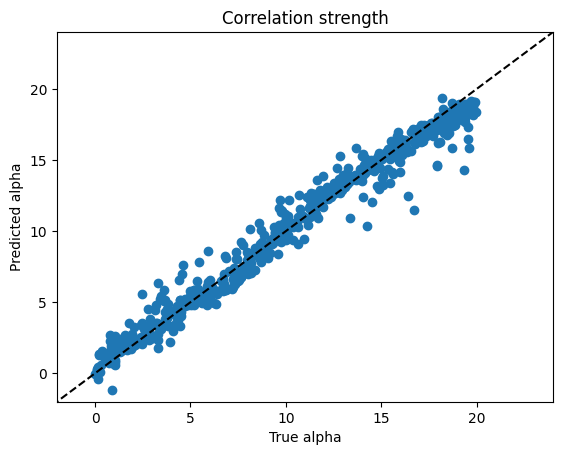

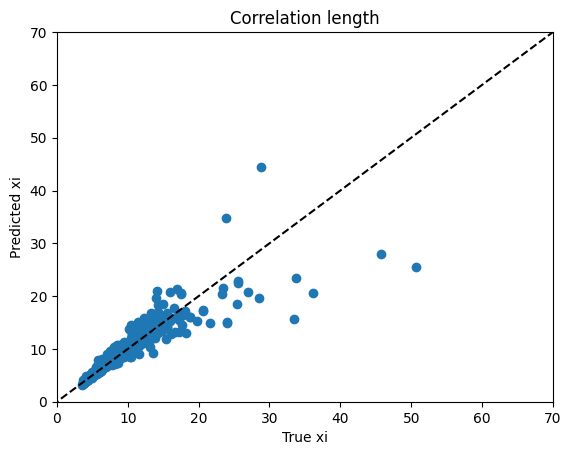

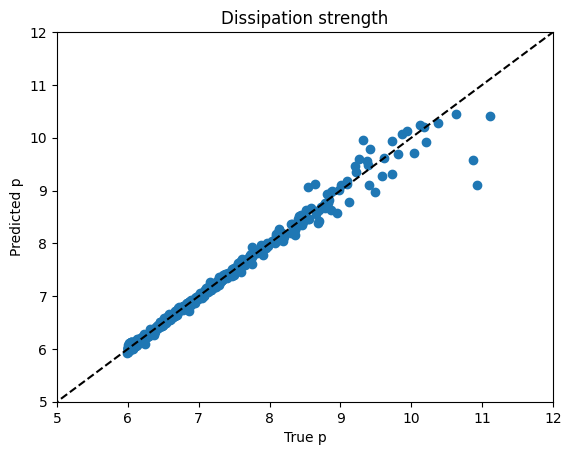

In [54]:
# check results on test set

results = nn.evaluate(M_test,mat_test, batch_size=32);
print("test loss:", results)
nn_test_sc = sc.inverse_transform(nn.predict(M_test));
mat_test_sc = sc.inverse_transform(mat_test);

plt.scatter(mat_test_sc[:,0],nn_test_sc[:,0]);
plt.plot([-100,100],[-100, 100],"--k")
plt.xlabel("True alpha");
plt.ylabel("Predicted alpha");
plt.axis([-2, 24, -2, 24])
plt.title("Correlation strength")

plt.figure()
plt.scatter(mat_test_sc[:,1],nn_test_sc[:,1]);
plt.plot([-100, 100],[-100, 100],"--k")
plt.xlabel("True xi");
plt.ylabel("Predicted xi");
plt.axis([0, 70, 0, 70])
plt.title("Correlation length")

plt.figure()
plt.scatter(mat_test_sc[:,2],nn_test_sc[:,2]);
plt.plot([-100, 100],[-100, 100],"--k")
plt.xlabel("True p");
plt.ylabel("Predicted p");
plt.axis([5, 12, 5, 12])
plt.title("Dissipation strength")

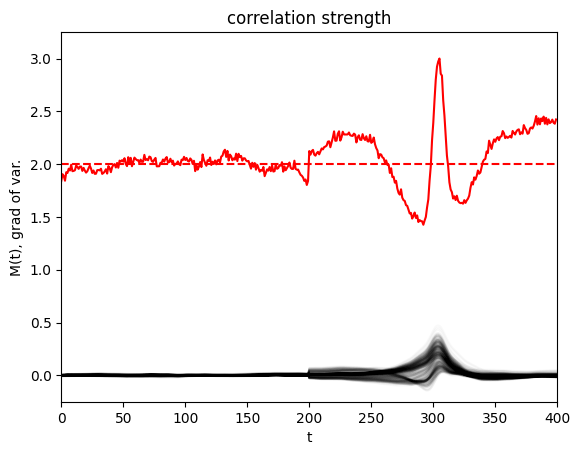

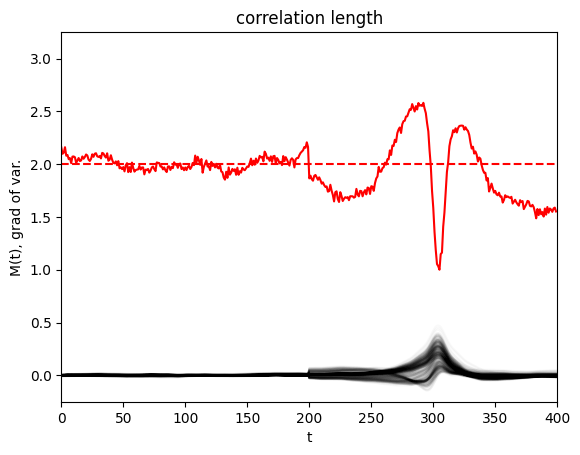

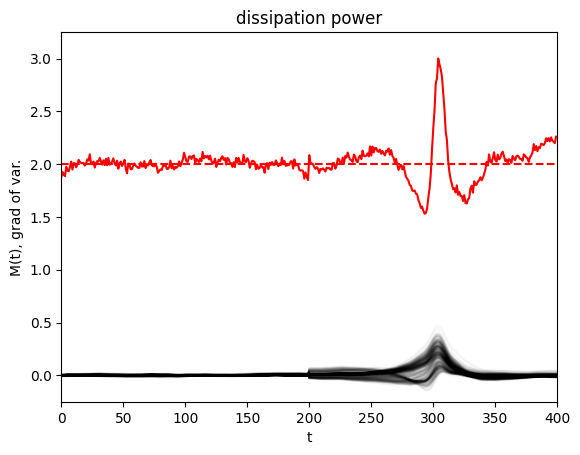

In [55]:
# heatmap of feature importance in the time domain
from keras import backend as k
import tensorflow as tf

var_names = ["correlation strength", "correlation length", "dissipation power"]

for tar_var in range(3):
    in_tensor = tf.convert_to_tensor(M_test) # we will track gradients w.r.t. M(t)
    with tf.GradientTape() as t:
        t.watch(in_tensor)
        tar_output = tf.gather(nn(in_tensor), tar_var, axis=1) # keep track of the tar_var output

    grads = t.gradient(tar_output, in_tensor).numpy() # comput gradient using tensorflow
    grad_sum = np.sum((grads),axis=0) # sum along all testing curves

    plt.figure()
    plt.plot((M_train[1:500,:]).T,color=(0,0,0,.025))
    plt.plot(2+grad_sum/np.max(np.abs(grad_sum)),'r')
    plt.plot([0, 400],[2, 2],'--r')
    plt.title(var_names[tar_var])
    plt.xlabel('t')
    plt.axis([0, 400, -.25, 3.25])
    plt.ylabel('M(t), grad of var.')

In [67]:
print(np.shape(M_eval))
print(np.shape(M_test))
print(np.shape(M_train[0])[0])
print(np.shape(M_eval[0])[0])

(6000, 400)
(600, 400)
400
400


In [74]:
### Evaluate

predictions = nn.predict(M_eval)

188/188 [==============================] - 2s 8ms/step


In [75]:
np.shape(predictions)

(6000, 3)

In [76]:
from google.colab import drive
drive.mount('/content/drive')

np.savetxt('/content/drive/MyDrive/' + f_prefix + '_mat_info_eval.txt', predictions, delimiter='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# explanation:

So for the Gauss Model above we decided to do a fully connected Neural Network that will eventually go down to a three neuron output for our three predictions, not unlike the example given. However, we wanted to apply some sort of feature extraction, and to do so we put an autoencoder at the start of the network. This yeilded very promising results, and after some tweaks to hyperparameters we got a validation loss low enough we thought it was sufficent to move on :)

In [ ]:
########################## RKKY MODEL #####################################################

In [53]:
f_prefix = "RKKY"; # RKKY functional between nuclei

mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos

print("Loading into numpy arrays...")
# settings of each simulated material:
# format:  |   α  |   ξ  |   d  |
mat_info = np.loadtxt(mat_file, comments="#", delimiter=None, unpack=False);

# M(t) curve for each simulation, model:
M_r = np.loadtxt(M_file_r, comments="#", delimiter=None, unpack=False);
M_i = np.loadtxt(M_file_i, comments="#", delimiter=None, unpack=False);
M = M_r + 1j*M_i;

# M(t) curve for each simulation, eval:
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

M_r_eval = np.loadtxt(M_file_r, comments="#", delimiter=None, unpack=False);
M_i_eval = np.loadtxt(M_file_i, comments="#", delimiter=None, unpack=False);
M_eval = M_r_eval + 1j*M_i_eval;

print("Done with numpy loads")

Loading into numpy arrays...
Done with numpy loads


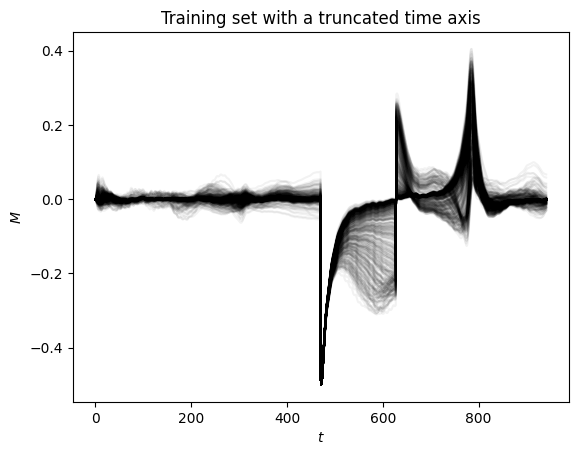

In [54]:
# number of M(t) curves
N_data = np.shape(M)[0]

# truncate time points
# !!! NOTE: May want to use all of the curve, takes longer to train though !!!
truncate = False

if truncate:
  time_keep = range(210,410); # centered roughly at the echo
  M_trunc = M[:,time_keep];
  M_eval = M_eval[:,time_keep]

else:
  M_trunc = M

# split into real and imaginary
# M_trunc = np.reshape(M_trunc,(np.shape(M_trunc)[0], np.shape(M_trunc)[1],1))
# M_eval = np.reshape(M_eval,(np.shape(M_eval)[0], np.shape(M_eval)[1],1))

# M_trunc_uncomplex = np.concatenate((np.real(M_trunc), np.imag(M_trunc)),axis=2)
# M_eval = np.concatenate((np.real(M_eval), np.imag(M_eval)),axis=2)

M_trunc_uncomplex = np.concatenate((np.real(M_trunc), np.imag(M_trunc)),axis=1)
M_eval = np.concatenate((np.real(M_eval), np.imag(M_eval)),axis=1)

# rescale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

mat_info_scaled = sc.fit_transform(mat_info);

# partition data into a training and testing set using a random partition
from sklearn.model_selection import train_test_split
M_train, M_test, mat_train, mat_test = train_test_split(M_trunc_uncomplex, mat_info_scaled, test_size=0.1)

# plot the fist 500 elements of the training set, for visualizing variations in the data
plt.plot((M_train[1:500,:]).T,color=(0,0,0,.05));
plt.xlabel("$t$")
plt.ylabel("$M$")
plt.title("Training set with a truncated time axis");

N = np.shape(M_train[0])[0]

M_train = M_train.reshape(-1,1,N)
M_test = M_test.reshape(-1,1,N)

(1, 942)

In [58]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Reshape
from tensorflow.keras.optimizers import SGD

# Assuming the input data has already been preprocessed and split into train and test sets

# Reshape the input data to be suitable for RNN (LSTM)
# X_train_rnn = M_train.reshape(-1, len(time_keep), 2)
# X_test_rnn = M_test.reshape(-1, len(time_keep), 2)

N = np.shape(M_train[0])[1]

# Define the RNN model

rnn = Sequential()
#rnn.add(Reshape(input_shape=(None,N), target_shape=(N,2)))
#rnn.add(LSTM(64, input_shape=(N,2),return_sequences=True, activation='relu'))
rnn.add(LSTM(64, input_shape=(1,N), return_sequences=True))
rnn.add(LSTM(64, activation='relu'))
rnn.add(Dense(3, activation='linear'))

# Compile the model
rnn.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum = 0.99))

In [70]:
rnn.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.005, momentum = 0.99))

In [71]:
#@title Default title text
# Training the Model
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from google.colab import drive
drive.mount('/content/drive')
tf.config.run_functions_eagerly(True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1.e-8)
early_stopping_cb = EarlyStopping(patience=10)
checkpoint_cb = ModelCheckpoint("/content/drive/MyDrive/" + f_prefix + ".h5", save_best_only=True)

history = rnn.fit(M_train, mat_train, epochs=100, batch_size=32,
                  validation_data=(M_test,mat_test),
                  callbacks=[reduce_lr, checkpoint_cb, early_stopping_cb], 
                  verbose=2)


# nn.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum = 0.99) )
# history = nn.fit(M_train, mat_train, epochs=250, batch_size=128, verbose=2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/100
169/169 - 12s - loss: 0.5255 - val_loss: 0.6185 - lr: 0.0050 - 12s/epoch - 72ms/step
Epoch 2/100
169/169 - 11s - loss: 0.6199 - val_loss: 0.5590 - lr: 0.0050 - 11s/epoch - 68ms/step
Epoch 3/100
169/169 - 10s - loss: 0.6031 - val_loss: 0.5514 - lr: 0.0050 - 10s/epoch - 59ms/step
Epoch 4/100
169/169 - 11s - loss: 0.5871 - val_loss: 0.5414 - lr: 0.0050 - 11s/epoch - 63ms/step
Epoch 5/100
169/169 - 11s - loss: 0.5335 - val_loss: 0.4672 - lr: 0.0050 - 11s/epoch - 63ms/step
Epoch 6/100
169/169 - 10s - loss: 0.5278 - val_loss: 0.4987 - lr: 0.0050 - 10s/epoch - 57ms/step
Epoch 7/100
169/169 - 10s - loss: 0.5345 - val_loss: 0.4865 - lr: 0.0050 - 10s/epoch - 60ms/step
Epoch 8/100
169/169 - 11s - loss: 0.5332 - val_loss: 0.4696 - lr: 0.0050 - 11s/epoch - 63ms/step
Epoch 9/100
169/169 - 11s - loss: 0.5179 - val_loss: 0.4607 - lr: 0.0050 - 11s/epoch - 63ms/ste

In [72]:
# Evaluate the rnn model on test data
results = rnn.evaluate(M_test, mat_test, batch_size=32)
print("Test loss:", results)

19/19 [==============================] - 1s 38ms/step - loss: 0.4425
Test loss: 0.44247114658355713


19/19 [==============================] - 1s 44ms/step - loss: 0.4425
test loss: 0.44247114658355713
19/19 [==============================] - 1s 32ms/step


Text(0.5, 1.0, 'Dissipation strength')

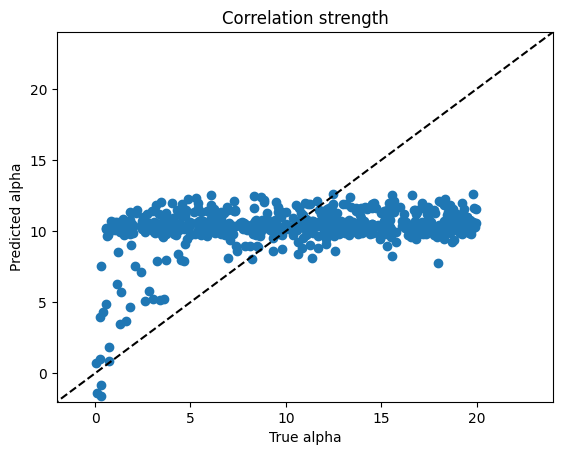

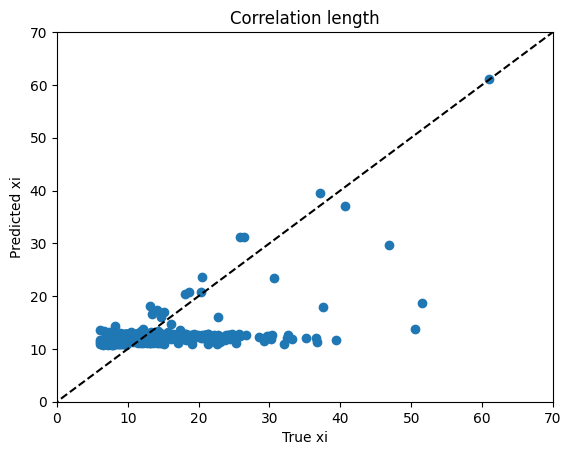

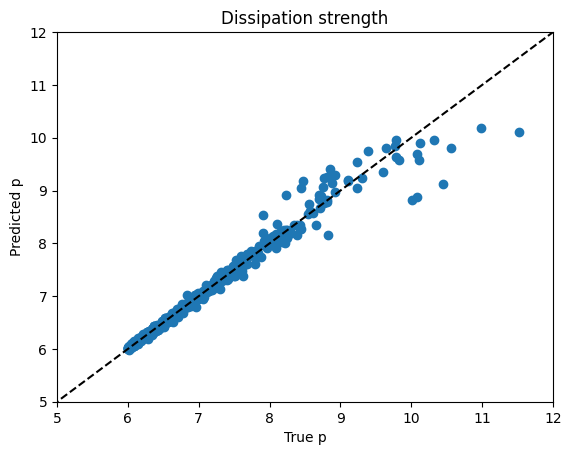

In [73]:
# check results on test set

results = rnn.evaluate(M_test,mat_test, batch_size=32);
print("test loss:", results)
nn_test_sc = sc.inverse_transform(rnn.predict(M_test));
mat_test_sc = sc.inverse_transform(mat_test);

plt.scatter(mat_test_sc[:,0],nn_test_sc[:,0]);
plt.plot([-100,100],[-100, 100],"--k")
plt.xlabel("True alpha");
plt.ylabel("Predicted alpha");
plt.axis([-2, 24, -2, 24])
plt.title("Correlation strength")

plt.figure()
plt.scatter(mat_test_sc[:,1],nn_test_sc[:,1]);
plt.plot([-100, 100],[-100, 100],"--k")
plt.xlabel("True xi");
plt.ylabel("Predicted xi");
plt.axis([0, 70, 0, 70])
plt.title("Correlation length")

plt.figure()
plt.scatter(mat_test_sc[:,2],nn_test_sc[:,2]);
plt.plot([-100, 100],[-100, 100],"--k")
plt.xlabel("True p");
plt.ylabel("Predicted p");
plt.axis([5, 12, 5, 12])
plt.title("Dissipation strength")

In [77]:
M_eval = M_eval.reshape(-1,1,N)

In [78]:
### Evaluate

predictions = rnn.predict(M_eval)

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


188/188 [==============================] - 8s 42ms/step


In [79]:
from google.colab import drive
drive.mount('/content/drive')

np.savetxt('/content/drive/MyDrive/' + f_prefix + '_mat_info_eval.txt', predictions, delimiter='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#explanation:

For the RKKY model above, we decided to go for a RNN in order to take advantage of its capabilities with time series. This required us to reshape the input data, as well as opting to not truncate the data so we can train on the whole set. Once we set up the RNN with LSTM layers, we defined multiple callbacks on the training, including a reduction of the learning rate and an early stopping condition. Then we trained our model and, noticing when it appeared to tapper off in loss reduction, we recompiled it with a larger learning rate and then trained again. We repeated this process until the loss reach under 0.45, where we could not seem to get out of that asymptote and after many hours had to call it there. For this reason, unfortunately our code cannot be run sequentially (in this section) and come out with the same results. Regardless we feel like for such a difficult training set as RKKY data is, we did the best we could with this attempt.